# Week 6: Matrix Factorization for Feature Reduction and Misc Topics in Data Preparation

# Miscellaneous Topics in Data Preparation

## Box-Cox Transformation

To remove skewness in the data that usually manifest as heteroskedastic errors, we can use the $\lambda$ (usually between -5 and 5) Box-Cox transformation as follows:

\begin{align*}
y(\lambda) = \begin{cases}
\frac{y^\lambda - 1}{\lambda} & & \text{if } \lambda \neq 0\\
\log(y) & & \text{if } \lambda = 0
\end{cases}
\end{align*}

The idea is that skewed distributions can often be interpreted as power transformation of the normal distribution:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200531214708/powerlaw..png" width="40%">

If a good $\lambda$ is chosen, the Box-Cox transformation stretches out the samller range to enlarge its variability, and shrinks the large range to reduce its variability. After transformation, use QQ plot and normality tests (Shapiro-Silk or KS) to check for normality.

## Notes on Detrending

When incorporating time series variables in a factor-based model such as OLS and SVM, the time series variable will have to be detrended. A posteriori knowledge such as inflation rates can be used to detrend a time series variable. Alternatively, if such info is not available, one can estimate a parameterized time series model as function of $t$ or trend, and then subtract the trend component to obtain the detrended variable.



# A Review of Eigenvalues and Eigenvectors

### Definition

Let $T: \mathbb{R}^n \rightarrow \mathbb{R}^n$ be a linear transformation operator, a nonzero vector $v \in \mathbb{R}^n$ is an eigenvector of $T$ if $T(v)$ is a scalar multiple of $v$. In other words, write $A$ as the matrix representation of $T$ (possible if $n < \infty$), then it suffices that there exists eigenvalues $\lambda$ with:

\begin{align*}
 Av = \lambda v
\end{align*}

In essence, an eigenvector $v$ of a linear transformation $T$ is a nonzero vector that, when $T$ is applied to it, does not change direction. As $v$ is nonzero, it means that the equation has nontrivial solutions:

\begin{align*}
(A-\lambda I)v = 0
\end{align*}

Which means that $A-\lambda I$ is not of full rank, or equivalently $\det(A-\lambda I) = 0$. Define the polynomial $F(\lambda) = \det(A-\lambda I)$ the characteristic polynomial of $A$. We see that eigenvalues $\lambda$ need not be distinct, or real-valued.

#### Example: Shear Mapping

Consider the shear mapping on the 2-dimensional Eucliean space represented by matrix:

\begin{align*}
\begin{bmatrix}
1 & 1\\
0 & 1
\end{bmatrix}
\end{align*}

Points in the top half are moved to the right, and points in the bottom half are moved to the left, proportional to how far they are from the horizontal axis that goes through the middle of the painting. Note that $[x,0]$ is an eigenvector with $\lambda=1$, so the blue vector in the image below does not change direction when the shear mapping is applied on the Mona Lisa image. By considering a eigenvectors with unit length, the magnitude of the eigenvalues describe the length transformation along the direction, for example, as $\lambda=1$ in the shear transformation, the eigenvector (blue) was not lengthened or shortened.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Mona_Lisa_eigenvector_grid.png/320px-Mona_Lisa_eigenvector_grid.png" width="30%">

#### Example: Complex Eigenvalue

We have seen that real-valued eigenvalues offers an affine transformation visualization with intuitions of streching along the directions of eigenvectors in which the relative magnitudes for each basis $v_i$ is given by the magnitude of $\lambda_i$, now consider the following matrix with complex eigenvalues:

\begin{align*}
A = \begin{bmatrix}
\cos(\theta) & \sin(\theta)\\
-\sin(\theta) & \cos(\theta)
\end{bmatrix}
\end{align*}

Solving for the characteristic polynomial,

\begin{align*}
\lambda &= \cos(\theta) + i \sin(\pm\theta) = e^{\pm i \theta}\\
v &= 
\begin{bmatrix}
1\\
i
\end{bmatrix}, 
\begin{bmatrix}
1\\
-i
\end{bmatrix}
\end{align*}

What is the intuition of the linear transformation mapping $T$ represented by this matrix? Recall that $A$ in this case corresponds to a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix). By defintion, an eigenvector $v$ is such that the $T$-transformation is equivalent to a scalar multiplication: $Tv=\lambda v$. To achieve a rotation by multiplying a vector with a scalar, the scalar and vector will have to be complex. The following GIF from this [math SE thread](https://math.stackexchange.com/questions/241097/geometric-interpretation-for-complex-eigenvectors-of-a-2%C3%972-rotation-matrix) demonstrate the geometric interpretation of $e^{i\theta} \times [1,i]$:

<img src="https://i.stack.imgur.com/t80MU.gif" width="20%">


## Properties of Eigenvalues and Eigenvectors

### Algrebraic Properties

1. The sum of eigenvalues is equal to the matrix trace
    - See [here](https://math.stackexchange.com/questions/546155/proof-that-the-trace-of-a-matrix-is-the-sum-of-its-eigenvalues) for a mechanical proof
2. The eigenvalues of upper/lower triangular matrices are the diagonal elements 
    - direct consequence of characterstic polynomial being the determinent function
3. Complex eigenvalues come in conjugate pairs 
    - direct consequence of polynomial roots of real coefficients
4. Power operations, including ^-1 for inverse and exponentiation, are preserved in eigenvalues 
    - can be derived from algebraic manipulation, noting that exponential function is a polynomial series


### Linear Independence

Eigenvectors $v_1, v_2, \ldots, v_n$ corresponding to distinct eigenvalues $\lambda_1, \lambda_2, \ldots, \lambda_n$ are linearly independent.

#### Proof

Suppose the contrary, that there exists a subset of $k \leq n$ eigenvectors $\{v_{i(1)}, v_{i(2)}, \dots, v_{i(k)}\}$ that are linearly dependent with $v_{i(k)} \in span(v_{i(1)}, v_{i(2)}, \ldots, v_{i(k-1)})$ where $v_{i(1)}, v_{i(2)}, \ldots, v_{i(k-1)}$ are linearly independent:

\begin{align*}
v_{i(k)} &= \sum_{j=1}^{k-1} \alpha_j v_{i(j)}\\
A(v_{i(k)}) &= \sum_{j=1}^{k-1} \alpha_j A(v_{i(j)})\\
\lambda_{i(k)} v_{i(k)} &= \sum_{j=1}^{k-1} \alpha_j \lambda_{i(j)} v_{i(j)}
\end{align*}

Note that,

\begin{align*}
\lambda_{i(k)} v_{i(k)} = \lambda_{i(k)} \sum_{j=1}^{k-1} \alpha_j  v_{i(j)} &= \sum_{j=1}^{k-1} \alpha_j \lambda_{i(j)} v_{i(j)}\\
\sum_{j=1}^{k-1} \alpha_j \big(\lambda_{i(k)}-\lambda_{i(j)}\big) v_{i(j)} &= 0\\
\end{align*}

Since $v_{i(1)}, v_{i(2)}, \ldots, v_{i(k-1)}$ are linearly independent and $\lambda_{i(1)}, \lambda_{i(2)}, \ldots, \lambda_{i(k-1)}$ are distinct, $\alpha_j = 0$.

### Orthogonality for Symmetric $A$

If $A$ is symmetric, then the eigenvectors from distinct eigenvalues are orthogonal to each other.

#### Proof

Let $v_1, v_2$ be eigenvectors from distinct eigenvalues $\lambda_1, \lambda_2$. 

\begin{align*}
v_1^T A v_2 &= v_1^T \lambda_1 v_2 = \lambda_1 v_1^T v_2\\
v_2^T A v_1 &= v_2^T \lambda_2 v_1 = \lambda_2 v_1^T v_2
\end{align*}

Because $A$ is symmetric and $v_2^T A v_1$ are scalars:

\begin{align*}
v_2^T A v_1 &= \big( v_2^T A v_1 \big)^T\\
&=  v_1^T A^T v_2 = v_1^T A v_2\\
\therefore \lambda_1 v_1^T v_2 &= \lambda_2 v_1^T v_2\\
\end{align*}

Because $\lambda_1, \lambda_2$ are distinct, $v_1^T v_2 = 0$ and hence $(v_1, v_2)$ are orthogonal.

### Eigendecomposition

If $A$ has $n$ linearly independent eigenvectors, then it can be decomposed as $A = Q^{-1} \Lambda Q$ where $Q = [v_1, \ldots, v_n]$ is the matrix with eigenvector columns, and $\Lambda$ is a diagonal matrix with eigenvalues aligned in diagonal according to the order in $Q$.

#### Proof

\begin{align*}
Av_k &= \lambda_k v_k & & \text{ for all } k\\
AQ &= Q \Lambda & & \\
A &= Q \Lambda Q^{-1} & & \text{ inverse exists $\because$	linear independence }
\end{align*}

### Principal Axis Theorem

The following statements are equivalent:
1. $A$ is symmetric
2. $\exists$ an orthonormal basis for $\mathbb{R}^n$ consisting of eigenvectors of $A$
3. $\exists$ orthogonal matrix $P$ such that $P^T A P$ is diagonal 

#### Proof

Check [here](http://www.math.umd.edu/~tjh/340_symmetric.pdf) for an analytical proof.

#### Remarks

- We can be assured that symmetric matrices have real valued eigenvalues: [proof](https://ocw.mit.edu/courses/mathematics/18-06sc-linear-algebra-fall-2011/positive-definite-matrices-and-applications/symmetric-matrices-and-positive-definiteness/MIT18_06SCF11_Ses3.1sum.pdf).
- An orthonormal basis for $\mathbb{R}^n$ consists of $n$ mutually orthogonal vectors of unit length (with respect to the dot product) such that all $x \in \mathbb{R}^n$ can be expressed as linear combinations of the basis.
- A matrix $P$ is orthogonal if $P P^T = I$.
- The Principal Axis Theorem essentially asserts that symmetric matrices have $n$ linearly independent eigenvectors, and are therefore diagonalizable by eigendecomposition.
- Even though having $n$ distinct eigenvalues will be a sufficient condition for the result to hold, note that symmetric matrices need not have $n$ distinct eigenvalues. An example is the shear matrix in the section above.
- The eigenspace is often referred as the spectrum of $A$. The Princpal Axis Theorem is also known as the Spectral Theorem.
- A positive definite matrix is a symmetric matrix for which all eigenvalues are positive.

#### Intuition

As $P = [v_1, v_2, \ldots, v_n]$ we can write:

\begin{align*}
A &= \begin{bmatrix}
v_1^T & v_2^T & \cdots & v_n^T
\end{bmatrix} 
\begin{bmatrix}
\lambda_1 &  &  & \\
& \lambda_2 & & \\
& & \ddots & \\
& & & \lambda_n
\end{bmatrix}
\begin{bmatrix}
v_1\\ 
v_2\\ 
\vdots\\ 
v_n
\end{bmatrix} \\
&= \sum_{i=1}^n \lambda_i v_i^T v_i
\end{align*}

Note that $v_i^T v_i$ is the matrix of the projection of $\mathbb{R}^n$ onto the line $\mathbb{R} v_i$, so we have expressed A as a sum of [orthogonal projections](https://www.math.uh.edu/~jiwenhe/math2331/lectures/sec6_3.pdf) (orthogonal projection scalar $\lambda_i v_i^T$ on $v_i$ axis). Alternatively, the linear transformation $T$ represented by $A$ can be regarded as rotating the axes $[e_1, e_2, \ldots, e_n]$ to $[v_1, v_2, \ldots, v_n]$, stretched by $[\lambda_1, \lambda_2, \ldots, \lambda_n]$.

# Principal Component Analysis

## Overview

As a direct consequence of the Principal Axis Theorem, Principal Component Analysis was introduced by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson), and later independently by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling). It performs a change of basis on the data using eigendecomposition of the sample covariance matrix, extracting the __principal components__ of the data. PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. To sum up, here are the steps for PCA:

1. Standardize explanatory data
2. Perform PCA with eigendecomposition, get transformed data in terms of orthogonal projections on principal components
3. Select $p$ principal components to train model
4. Reverse transform model parameters (if needed) and data, reverse standardize the forecast

Following from the Principal Axis Theorem, the principal components of a dataset can be obtained by performing eigendecomposition on the sample covariance matrix. In relation to the section above, here are some properties of PCA.

### Data Transformation

It is recommended that the data be standardized to zero mean and unit variance prior to performing PCA. We see from below that PCA is essentially a variance maximizing exercise. Therefore, we would want the data to be unit free, so measurement units will not drive spurious variations and bias the importance in data. While it is [not necessary to center the data](https://www.quora.com/Why-do-we-need-to-center-the-data-for-Principle-Components-Analysis) (in fact, we shouldn't center image data, as will be discussed below), it makes computation easier in evaluating covariance matrices and also provides an intuitive representation of the data transformation centering at the origin.

Considering the geometry of projection and coordinates (and the factor that $\Vert v_k \Vert = 1$), the change of basis using $p$ orthonormal principal components implies the following coordinate changes:

\begin{align*}
[x_1, x_2, \dots, x_K] &\rightarrow [x^T v_1, x^T v_2, \ldots, x^T v_p] \\
\underbrace{X}_\text{n $\times$ K}  &\rightarrow \underbrace{X}_\text{n $\times$ K }\underbrace{P}_\text{ K $\times$ p}
\end{align*}

Note that selecting principal components $p$ less than $K$ incurs information loss. For instance, reverse transform of the dataset $X$ requires the __full rank eigenmatrix__ $P$ ($K$ columns). With full rank $P$, to reverse the transformation one can simply right multiply the data with transformed coordinates $Z=XP$ with the inverse $P^{-1} = P^T$. Alternative, one may reverse a $ p \times 1$ regression coefficient in $v$ coordinates by the corresponding $p$ columns in $P^T$. 

### Uncorrelatedness

Let $\Sigma$ be the covariance matrix of data $X$, a collection of points $x_i \in \mathbb{K}$. The Principal Axis Theorem guarantees that since $\Sigma$ is symmetric, it can be decomposed as $\Sigma = P \Lambda P^T$ such that: $P = [v_1, v_2, \dots, v_K]$ is a matrix formed by $K$ linearly independent eigenvector columns and $\Lambda$ is a diagonal matrix of eigenvalues. 

So it follows that principal components are orthogonal (uncorrelated), making it a good technique to treat collinear features. Further, $[v_1, v_2, \dots, v_K]$ forms an orthonormal basis for $\mathbb{K}$, so we can express the original data as linear combinations of the eigenvectors - hence PCA is a change of basis operation.

### Maximal Variance

The __principal components__ of a collection of data points $X$ in with $x_i \in \mathbb{R}^K$ are a sequence of $K$ direction vectors, where the $k$-th vector is the direction of a line that best fits the data while being orthogonal to the first $k-1$ vectors. Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line. 

We claim that the eigenvectors are principal components. First, we show that the eigenvectors point to the directions of maximal variance. WLOG, suppose the data is centered at zero, $\bar{x} = 0$, and $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_K$. Let $u$ denote a unit vector, if it points to the direction at which the covariance of $u$ and $X$ is maximized, $u$ is a solution of:

\begin{align*}
&\max_{u:\Vert u \Vert =1} \frac{1}{n} \sum_{i=1}^n \big( u^Tx_i \big)^2 \\
\iff &\max_{u:\Vert u \Vert =1} E[(Xu)^T(Xu)] \iff \max_{u:\Vert u \Vert =1} E[u^T X^T X u]\\
\iff &\max_{u:\Vert u \Vert =1} u^T E[X^T X] u \iff \max_{u:\Vert u \Vert =1} u^T \Sigma u\\
\end{align*}

Now express $\Sigma = P \Lambda P^T$,

\begin{align*}
&\max_{u:\Vert u \Vert =1} u^T \Sigma u\\
\iff &\max_{u:\Vert u \Vert =1} u^T \big( P \Lambda P^T \big) u\\
\iff &\max_{u:\Vert u \Vert =1} [u^Tv_1, u^Tv_2, \ldots, u^Tv_K] \Lambda [u^Tv_1, u^Tv_2, \ldots, u^Tv_K]^T\\
\iff &\max_{u:\Vert u \Vert =1} \sum_{k=1}^K \lambda_k (u^T v_k)^2 
\end{align*}

Now note that since $\{v_k\}$ is an orthonormal basis, we can write $u = \sum_j \alpha_j v_j$ and $u^T v_k = \alpha_k$. So the objective function becomes $\sum_{k=1}^K \lambda_k \alpha_k^2$. Since $\Vert u \Vert = 1$ and $\lambda_1 \geq \lambda_k \forall k$ we want to assign the maximal weight to $\alpha_1$ i.e. $u = v_1$.

Note that the solution for maximizing covariance necessarily minimizes the orthogonal errors. One can check an analytical proof [here](https://stats.stackexchange.com/questions/32174/pca-objective-function-what-is-the-connection-between-maximizing-variance-and-m).

<img src="http://alexhwilliams.info/itsneuronalblog/img/pca/pca_two_views.png" width="50%">

We already showed orthogonality. So the principal components of $X$ are the eigenvectors $[v_1, v_2, \dots, v_K]$ of $\Sigma$.

<img src="https://i.stack.imgur.com/40mcq.png" width="25%">

In short, quoting from [this answer](https://www.quora.com/How-does-the-principal-component-analysis-in-real-life-look-like) "<i>Imagine a boring soccer match lasts for 90 minutes with numerous parallel passes in the midfield, and the fouls and similar boring stuff. PCA would be like 3 mins highlights of the same match with principal moments like goals, penalties, red cards etc. which happens infrequently in a boring match. Highlights are informative, full matches are boring, preparing highlights of a boring match is time consuming (complexity).</i>" Check Appendix A of [Madeleine Udell's dissertation](https://people.orie.cornell.edu/mru8/doc/udell15_thesis.pdf) for more mathematical interpretations.


# Examples

## Image Compression

PCA can be applied to the R, G, and B color value scheme matrices of an image to reduce the dimensions of the matrix (image) and project those new dimensions to reform the image that retains its qualities. The PCA does not require centering of data. If it is chosen to be centered, the returned image according to packages such as `prcomp` will not have the right RGB values due to having their respective means subtracted from each pixel color vector. The more principal components selected, the higher the clarity of the compressed image. E.g. the number of principal components decreases going to the right. Check [here](https://medium.com/@AaronSchlegel/image-compression-with-principal-component-analysis-f6e8e73065af) for an implementation in R.

<img src="https://i.imgur.com/LooQL9x.png" width="40%">

## Characterizing Financial Instruments

PCA can be applied in interest rate trading, as described [here](https://www.quora.com/What-are-some-examples-on-how-is-PCA-Principal-Component-Analysis-used-in-the-interest-rate-trading) to reduce the parameter space and achieve higher out of sample prediction accuracy. There are over 40 actively traded instruments that are based on the US interest rate curve. If we treat them all as separate securities, for instance like different stocks, then we will be forced to make 40 different models and hence we will need to fit 40 sets of parameters. However the underlying dimensionality of the problem is much less.

The following graph is from [Diebold and Li (2005)](https://www.sas.upenn.edu/~fdiebold/papers/paper49/Diebold-Li.pdf) in which they characterized the yield curves of bonds in terms of principal components (interpreted as latent dynamic factors) $\beta_1, \beta_2, \beta_3$. The term "loadings" refers to [coefficients in linear combination predicting a variable by the (standardized) components](https://stats.stackexchange.com/questions/92499/how-to-interpret-pca-loadings?rq=1). Rigorously speaking, the authors were using factor analysis, which is a bit different from PCA but they both extract the princial components.

<img src="https://qph.fs.quoracdn.net/main-qimg-b0cc75cd78eeea6b0f7f6f3b8185d46a">


## PCA Networks 

It is natural for PCA to be extended to tensor decomposition. PCA can be used in the first stages of a convolutional network for dimensionality reduction, as introduced in [Chan, Jia, Gao, Lu, Zeng, and Ma (2014)](https://arxiv.org/pdf/1404.3606.pdf). It was designed to be used for image classification problems, and [Ground AI](https://www.groundai.com/project/visual-speech-recognition-using-pca-networks-and-lstms-in-a-tandem-gmm-hmm-system/1#bib.bib6) extended PCANet for visual speech recognition model. 

# Model Selection

The model selection process for PCA essentially involves determining the optimal number of principal components to be trunacted to next steps. Truncating denoises the data. The conceptual connection of PCA to regression is again helpful here — PCA is [analogous to fitting a smooth curve through noisy data](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/#notation). In this section we present metrics to aid model selection within the PCA class.

## Scree Plots

We have seen that the eigenvalues associated with each eigenvector are increasing function of the variance explained by the principal component represented by that eigenvector (recall that the first eigenvector of the largest eigenvalue points to the direction of maximal variance, and so on). It follows that we want to select the principal components with significant eigengenvalues. The scree plot of eigenvalues for each PC is designed for this intuitive process:

<img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Screeplotr.png">

A normalized version of the scree plot presents the explained variance ratio. The ratio defined for the $i$-th PC is defined by $\lambda_i / \sum_j {\lambda_i}$ so they sum to one across all PCs. 

<img src="http://alexhwilliams.info/itsneuronalblog/img/pca/scree.png" width="40%"> 

By the spirit of elbow method, we would select the number of PC after which the eigenvalues or explained variance ratio seem to level off. Despite its simplicity, significance is subjective and situations where the scree plot is not clear cut can lead to ambiguous selection. 

To aid our judgement, the __participitation ratio__ gives us a sense of the dimensionality of the dataset. It is defined by:

\begin{align*}
PR = \frac{(\sum_{k=1}^K \lambda_k)^2}{\sum_{k=1}^K \lambda_k^2}
\end{align*}

For example if all PC explain equal variance $\lambda_k = \lambda$ then $PR=K$ meaning that the data is indeed $K$-dimensional. For a set of eigenvalues with exponential decay rate $\kappa^{-1}$, $PR \approx 2\kappa$ so most variance is explained by the first $2\kappa$ PC's.

## Gavish & Donoho's Threshold

[Gavish & Donoho (2014)](https://ieeexplore.ieee.org/document/6846297) present a long overdue result on this problem and their answer is surprisingly simple and concrete. Essentially, the optimal procedure boils down to estimating the noise in the dataset, $\sigma$, and then throwing away all components whose singular values are below a specified threshold. For a square $n \times n$ matrix, this threshold is: $\frac{4\sigma \sqrt{n}}{\sqrt{3}}$. Note that this method does not hold if there are missing data, or the different noise model is different. Check [`chooseGavishDonoho`](https://www.rdocumentation.org/packages/PCAtools/versions/2.3.3/topics/chooseGavishDonoho) under the R `PCAtools` package for implementation details.

## Loadings (tables and biplots)

With sufficient knowledge of the data generating process, the loadings plot (for 2-dimensional PC selection) and tables (arbitrary $p$) can be useful to determine which PC are useful and robust. 

A biplot plot shows how strongly each characteristic influences a principal component. The coordinates correspond to the coefficients of the original variables in $X$ in terms of PC, scaled by the eigenvalues. [This thread](https://stats.stackexchange.com/questions/104306/what-is-the-difference-between-loadings-and-correlation-loadings-in-pca-and) explains and proves how the loadings are also correlations of the original variables with the PC. 

<img src="https://blog.bioturing.com/wp-content/uploads/2018/11/PCA-bi-plot.png" width="50%">

A heat map like the following also provides insights on what variables are driving the PC together, and help us decide what processes are probably described by the PC's (if possible) (from a [real estate example](https://towardsdatascience.com/principal-component-analysis-algorithm-in-real-life-discovering-patterns-in-a-real-estate-dataset-18134c57ffe7) of PCA).

<img src="https://miro.medium.com/max/2400/1*5CVUyQoG4ct6UDM7dmy2jQ.jpeg" width="60%">

## Horn's Parallel Analysis

[Parallel analysis](https://stats.idre.ucla.edu/stata/faq/how-to-do-parallel-analysis-for-pca-or-factor-analysis-in-stata/) is a method for determining the number of components or factors to retain from pca or factor analysis. Essentially, the program works by creating a random dataset with the same numbers of observations and variables as the original data. A correlation matrix is computed from the randomly generated dataset and then eigenvalues of the correlation matrix are computed. When the eigenvalues from the random data are larger then the eigenvalues from the pca or factor analysis you know that the components or factors are mostly random noise. Parallel analysis can be implemented with `paran` in R and [with some data manipulation](https://towardsdatascience.com/trying-out-dask-dataframes-in-python-for-fast-data-analysis-in-parallel-aa960c18a915) in Python.

In the example below, the parallel analysis for this example indicates that two components should be retained. There are two ways to tell this; (1) two of the eigenvalues in the PCA column are greater than the average eigenvalues in the PA column, and (2) the dashed line for parallel analysis in the graph crosses the solid pca line before reaching the third component.

<img src="https://stats.idre.ucla.edu/wp-content/uploads/2016/02/pca_para.png" width="50%">

## Latent Semantic Analysis

Applying PCA on textual data in the form of bags-of-words, we can use PCA on a set of documents (each row in a bag-of-word) to idendify latent themes. Check [here](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf) for more info.

# Pros and Caveats

Advantages for PCA's include:
1. Removes Correlated Features
    - Note that PC's are orthogonal
2. Improves Computation Efficiency 
    - Because less variables are involved
3. Reduces Overfitting
    - Less noise and fewer parameters

While caveats of PCA include:
1. Loss of interpretability
    - It's unclear what features each principal components encode, and what proportion of each feature has more impact on the patterns we’re seeing
2. PCA overfits to noise if p > n
    - When we have more features than observations, it is an inconsistent estimator of the subspace of maximal variance
3. PCA becomes non-trivial to solve when data entries are missing
    - Check [Alex H Williams
     blogpost](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/#f4t) for more info
4. Information loss
    - A natural tradeoff of removing seemingly irrelevant PC
5. Reliance of orthogonality assumption
    - See below
    
### Discussion on Orthogonality Assumption

From [Shlens (2014)](https://arxiv.org/pdf/1404.1100.pdf?utm_content=bufferb37df&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer). In the context of dimensional reduction, one measure of success is the degree to which a reduced representation can predict the original data. In statistical terms, we must define an error function (or loss function). It can be proved that under a common loss function, mean squared
error (i.e. L2 norm), PCA provides the optimal reduced representation of the data. This means that selecting orthogonal directions for principal components is the best solution to predicting the original data.

However, consider the following data plots where the true covariance structure is not orthogonal. Clearly, PCA does not provide the best optimal reduced representation of the data.

<img src="https://qph.fs.quoracdn.net/main-qimg-b5c045c29cea0959ce2119fdc565ba48">

The solution to this paradox lies in the goal we selected for the analysis. The goal of the analysis is to decorrelate the data, or said in other terms, the goal is to remove second-order dependencies in the data. In the data sets of Figure 6, higher order dependencies exist between the variables. Therefore, removing second-order dependencies is insufficient at revealing all
structure in the data. Chang (1983)[https://courses.cs.washington.edu/courses/cse527/03au/pca.pdf] showed that the set of PC’s with the largest eigenvalues does not necessarily capture cluster structure info.

One possible solution is that if prior knowledge is known, then a nonlinearity kernel might be applied to the data to transform the data to a more appropriate naive basis.



# Extensions

## Kernel PCA

While PCA is effective in capturing linear (orthogonal) covariance structures, the data might have nonlinearities (see above discussion). We have seen a motivation for using kernel methods with SVM - the shortcut and efficiency of evaluating the kernel function $\kappa(x_1, x_2) = \Phi(x_1)^T \Phi(x_2)$ for a mapping of data $\Phi$ (which could map data to higher - possibly infinity - dimensional space) without having to evaluate $\Phi(x_1), \Phi(x_2)$ directly. We show that PCA algorithms also satisfy this. Suppose we apply a non-linear mapping $\Phi: \mathbb{R}^K \rightarrow \mathbb{R}^M$ on the data $X$. 

In the covariance matrix step, we just need to compute $\frac{1}{N-1}\Phi(X)^T\Phi(X)$, not necessarily $\Phi$. In the projection step, the projected coordinates are $\sum_i v_i^T\Phi(X) v_i$. Now noting the fact, omitting the [proof](https://people.eecs.berkeley.edu/~wainwrig/stat241b/scholkopf_kernel.pdf), that $\exists$ coefficients $\alpha_i$ such that $v_i = \alpha_i^T \Phi(X)$. We will see that it suffices to evaluate the kernel function.

Below is an example for which a kernel PCA is beneficial over the vanilla PCA, see [here](https://stats.stackexchange.com/questions/94463/what-are-the-advantages-of-kernel-pca-over-standard-pca). The data points on the left are located mostly along a curve in 2D. PCA cannot reduce the dimensionality from two to one, because the points are not located along a straight line. But still, the data are "obviously" located around a one-dimensional non-linear curve. So while PCA fails, there must be another way! And indeed, kernel PCA can find this non-linear manifold and discover that the data are in fact nearly one-dimensional.

<img src="https://i.stack.imgur.com/D7vyt.png" width="40%">

## Clustering

PCA is often used in conjunction with clustering algorithms, which helps to remove noises from the data. Check [this medium post](https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2) and [this U of Washington lecture slides](https://courses.cs.washington.edu/courses/cse527/03au/pca.pdf) for more detail.


## Sparse and Probabilistic PCA

We can view PCA as the following problem: find a $K \times K$ orthogonal rotation matrix $C$ and a $N \times K$ weights (loadings) that best fit the data:

\begin{align*}
\min_{C,W: C^TC=I} \Vert X - W^T C \Vert^2
\end{align*}

The regularized version of this least squares problem (e.g. Lasso and Ridge versions). Typically, this penalty/regularization choice causes the best $W$ and $C$ to be sparse (i.e. have many zero entries). This can be helpful for interpretation. Recall that we can express eigenvectors as linear combinations of samples (see kernel PCA discussion). An application is in gene expression datasets, we may want to limit ourselves so that each component — column of $C$ — only contains a handful of genes, rather than a large combination of all genes (which can be quite large). 

Another motivation for expressing PCA in this form is probabilistic PCA. While PCA is essentially non-parametric, there is also an absence of probabilistic models, making it uncompatible with comparison with other probabilistic approach, and (Bayesian) statistical inference. [Bishop and Tipping (1999)](https://www.di.ens.fr/~fbach/courses/fall2005/Bishop_Tipping_1999_Probabilistic_PCA.pdf) introduced the probabilistic PCA which extends PCA algorithms in a density estimation framework. Also, PPCA can deal with missing data. Check [here](https://people.cs.pitt.edu/~milos/courses/cs3750-Fall2007/lectures/class17.pdf) for more slides. 

In the probabilistic framework:

\begin{align*}
X = WZ + \mu + \varepsilon
\end{align*}

Where $Z$ is a set of latent variables with assumed distribution (e.g. $N(0,I)$), noise $\varepsilon$ also follows an assumed distribution. So we can represent the problem as a MLE. Examples of distributions include the logistic (which is shown to [work well with binary data](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/#everything-you-did-know-or-do-now)) and Poisson.



# Matrix Factorization Methods: SVD and NMF

Now that we are quite familiar with the linear algebraic framework for PCA, we'll take this opportunity to explore other matrix factorization methods commonly used in machine learning. Specifically, we will focus on two popular methods - Singular Value Decomposition (SVD) and Nonnegative Matrix Factorization (NMF). While PCA is an analytical framework defined on square (feature covariance) matrix, SVD and NMF are more generalized methods in a sense that they can be applied to rectangular matrices (in particular, the original data matrix). As a convention commonly used in the reference materials, we now assume that the data $X$ is arranged with $N$ columns of samples, each with $M$ features. For datasets such as collection images, it is often the case that $M \gg N$ ($M$ is the resolution/# pixels) so the data matrix $X$ is a tall rectangular matrix.

# Singular Value Decomposition

Mostly based on [Steve Brunton's](https://www.me.washington.edu/facultyfinder/steve-brunton) SVD [lecture series](https://www.youtube.com/watch?v=xy3QyyhiuY4&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv) and other sources as linked.

Singular Value Decomposition is a matrix factorization that generalizes the eigendecomposition of a square normal matrix to any $M \times N$ matrix via an extension of the [polar decomposition](https://en.wikipedia.org/wiki/Polar_decomposition#Matrix_polar_decomposition). The SVD of a real-valued $M \times N$ matrix $X$ is often expressed as:

\begin{align*}
\underbrace{X}_{M \times N}  = \underbrace{U}_{M \times M} \underbrace{\Sigma}_{M \times N} \underbrace{V^T}_{N \times N}
\end{align*}

WLOG, assume $M \geq N$ so $X$ is tall if rectangular. Here $U$ and $V$ are both orthogonal matrix with $U^{-1}=U^T$ amd $V^{-1}=V^T$, and $\Sigma$ is a rectangular diagonal matrix with non-negative real numbers on the diagonal. We refer to the columns in $U$ and $V$ (not $V^T$) as the __left-__ and __right-singular vectors__ of $X$. Whereas the the diagonal elements $\{\sigma_{ii}\}_{i=1}^{\min(M,N)}$ are known as the singular values. We will see in the following sections why the representation involves the transpose of $V$ (instead of writing $V^T$ as some matrix $W$).

We can be assured that the [SVD representation exists](https://gregorygundersen.com/blog/2018/12/20/svd-proof/#1-gram-matrices-as-positive-semi-definite), and is unique up to positive/negative sign restrictions (e.g. one can always flip signs in $U$ and $V$ to keep $U\Sigma V^T$ constant). 

## Geometric Interpretation

Consider a linear transformation $T$ represented by a matrix. The interpretation of SVD regarding the mapping $T$ is that every linear transformation is a scaling operation (diagonal), provided one uses the proper bases for the domain and range spaces. Regarding the matrix $X$ representing $T$, recall that multiplying this matrix by an orthogonal matrix is equivalent to rotating the original basis to the orthonormal basis consisting of the orthogonal matrix columns, while multiplying a diagonal matrix represents stretching/scaling. The SVD result essentially says that, any linear transformation can be expressed in a squence of <i>(rotation, scale, rotation)</i> tuple. The following animation provides an illustration in the 2-dimensional Euclidean space:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Singular_value_decomposition.gif/280px-Singular_value_decomposition.gif">

## Sum of Singular Matrices

Note that the sum of SVD should only involve $N$ terms (we assumed $M > N$) because the $N+1, N+2, \ldots, M$ rows of $\Sigma$ are zero. Noting this, we can write the SVD representation directly as multiplications, 

\begin{align*}
X = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + \cdots + \sigma_N u_N v_N^T
\end{align*}

Note that the outer product of $u_i$ and $v_i$, $u_i v_i^T$ is a singular matrix. This can be seen either by expressing $u_i v_i^T = [v_i^1 u_i, v_i^2 u_i, \ldots, v_i^N u_i]$ so all columns are multiplies of $u_i$. Therefore $X$ is becomposed as the sum of $N$ singular matrices with weights $\{\sigma_i\}$. Hence the name singular values. 

As the we only need to evaluate terms up to $N$, programming packages often offer an "economic SVD" simplification $X=\hat{U}\hat{\Sigma}V^T$ where $\hat{U}$, $\hat{\Sigma}$ are square matrices containing the first $N$ rows and columns.


## Dominant Correlation

By considering row-wise (across features) covariance, we can see how PCA is related to SVD. Recall that the feature (row-wise) covariance can be written as:

\begin{align*}
X X^T &= (U \Sigma V^T) (U \Sigma V^T)^T\\
&=  U \Sigma V^T V \Sigma^T U^T\\
&= U \Sigma \Sigma^T U^T
\end{align*}

Note that the columns of $U$ consists of the eigenvectors of $X X^T$, and the eigenvalues are given by the diagonal matrix $\Sigma \Sigma^T$:

\begin{align*}
(X X^T) U = U \Sigma \Sigma^T
\end{align*}

Note that the rank of $X X^T$ is the [same](https://gregorygundersen.com/blog/2018/12/20/svd-proof/#1-gram-matrices-as-positive-semi-definite) as the ranks of $X$ and $X^T$, so some of the eigenvalues will be zero - as dictated by the multiplication of rectangular diagonal matrices $\Sigma \Sigma^T$.

On the other hand, the observation (column-wise) covariance can be written as:

\begin{align*}
X^T X = V \Sigma^T \Sigma V^T
\end{align*}

So the columns of $U$ and $V$ are actually the principal components for the row- and column-wise covariance (hence the $V^T$ convention) - and they share the set of eigenvalues $\lambda_i = \sigma_i^2$. If we arrange $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_N$ then the first column of $U$ points to the linearly combination of __features__ with maximal variance / most information / most important, second to (an orthogonal) direction of the next max variance. An example of $U$ columns is the "eigenfaces" which themselves form a basis set of all images used to construct the across-feature covariance matrix - so every face in the dataset can be expressed as a linear combination of the eigenfaces. Likewise, columns in $V$ will point to the linear combinations of __samples__ that gives maximal information. The eigenfaces in the image below appear to be "prototype" faces, but this should not be a generalization of the method - as noted by [Lee and Seung (1999)](https://www.cs.princeton.edu/courses/archive/spring12/cos424/pdf/lee-seung.pdf) which we will cover in the next section, eigenfaces resemble distorted versions of whole faces, while a dimensionality reduction techniques that results in "prototypes" is [vector quantization (VQ)](https://en.wikipedia.org/wiki/Vector_quantization). We will see later that the eigenfaces might lack intuitive meaning if loadings imply a complex cancellations between positive and negative numbers.

<img src="https://upload.wikimedia.org/wikipedia/commons/6/67/Eigenfaces.png" width="20%">

Prior to deep networks, Facebook used SVD for facial recognition. With a good number of rank truncation, the error rate was still a bit behind human responses. In the final version, the team restructure the image dataset to a dataset of _implied skulls_, hoping to capture 3D features. The model was able to beat human after this change.

## Matrix Approximation

Consider the singular matrix series form again:

\begin{align*}
X = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + \cdots + \sigma_N u_N v_N^T
\end{align*}

Now that we have seen a principal axis interpretation of $\sigma, u, v$, a natural approximation of the large matrix $X$ would be to truncate series up to the first $r$ terms, i.e.,

\begin{align*}
X_r &= \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T + \cdots + \sigma_r u_r v_r^T\\
&\triangleq \tilde{U}_r \tilde{\Sigma}_r \tilde{V}^T_r
\end{align*}

Where the tilde and suffix $r$ represent the first $r$ rows and columns for the corresponding components. Note that $\tilde{U}_r$ is no longer guaranteed orthogonal. The __Eckard-Young Theorem__ asserts that $X_r$ is the best rank-$r$ approximation for $X$ in terms of the Frobenius matrix norm. The Fronbenius norm of a matrix is defined as the sum of squared elements in a matrix.

\begin{align*}
\tilde{U}_r \tilde{\Sigma}_r \tilde{V}^T_r &= \arg\max_{M: rank(M)=r} \Vert X - M \Vert_F\\
\Vert A \Vert_F &= \sqrt{\sum_{i,j} A_{ij}^2}
\end{align*}

Just like PCA, the compressed/predicted image will be the original/test vector $x$ projected on the extracted PC: $ \tilde{U}_r (\tilde{U}_r^T x)$ - which we have seen from the orthogonal projection interpretation of PCA.

## Comparison with PCA

We have seen that SVD is a generalization of PCA. Whereas SVD is applied to the data matrix itself, PCA applies to the covariance matrix (which might be expensive to evaluate). On the other hand, PCA is an analytical framework, while SVD has establied numerical algorithms for implementation. In fact, most PCA implementation probably has SVD backend. However, even though computing eigenvalues for large matrices can be inefficient, it is [not always the case](https://stats.stackexchange.com/questions/79043/why-pca-of-data-by-means-of-svd-of-the-data). The computational arguemnt for using SVD instead of the theoretical eigendecomposition framework of PCA lies in numerical [stability](https://math.stackexchange.com/questions/3869/what-is-the-intuitive-relationship-between-svd-and-pca), especially when small values are involved, as demonstrated in the linked thread.

## Randomized SVD

As data dimensinoality has grown tremendously over the years, vanilla SVD becomes computationally infeasible. Instead, researchers and practitioners are now relying on [randomized SVD] methods by selecting a subset of features. Check Steve Bruntob's [lecture](https://www.youtube.com/watch?v=vDSi271vUWk) for more info.

# Nonnegative Matrix Factorization

Largely based on and contains excerpts from [Lee and Seung (1999)](https://www.cs.princeton.edu/courses/archive/spring12/cos424/pdf/lee-seung.pdf).

## Motivation

Nonnegative Matrix Factorization (NMF) is first introduced by [Lee and Seung (1999)](https://www.cs.princeton.edu/courses/archive/spring12/cos424/pdf/lee-seung.pdf) paper on Nature. The motivation is, as the author noted, "<i>There is psychological and physiological evidence for parts-based representations in the brain, and certain computational theories of object recognition rely on such representations, but little is known about how brains or computers might learn the parts of objects</i>". The NMF is decided as an algorithm for to learn componentization structures in data (e.g. heuristic structures such as parts of faces and latent structures such as semantic themes of text). 

Let $X$ be a $M \times N$ matrix in which all elements $\{x_{ij}\}$ are nonnegative. For $r < \min\{M, N\}$ the authors introduced an algorithm to factorize $X$:

\begin{align*}
\underbrace{X}_{M \times N} = \underbrace{W}_\text{M $\times$ r } \underbrace{H}_\text{ r $\times$ N} 
\end{align*}

Here $W$ and $H$, known as the __basis__ and __activation__, are also constrained to be nonnegative. Ideally, the $W$ contains the extracted feature (compressed) parts and $H$ contains the loadings such that the $n$-th unit of observation can be approximated with a projection of the $W$-subspace, activated by the $n$-th loadings vector: $x_n = W h_n$. One can see that this is analogous to the mechanics of a neural network:

<img src="https://media.springernature.com/m312/springer-static/image/art%3A10.1038%2F44565/MediaObjects/41586_1999_Article_BF44565_Fig3_HTML.gif">

The authors provided a probabilistic framework to characterize $W$ and $H$. Suppose that the deterministic data generating process has mean value $WH$, compounded with [shot noises](https://en.wikipedia.org/wiki/Shot_noise) following a Poisson distribution. Thus realizations $X$ can be considered orginating from a $\text{Poisson}(WH)$ distribution. Recall that the Poisson likelihood is $\frac{(WH)^X e^{-WH}}{X!}$, for which the logarithm is related to the expression in the minimization objective function. Given $r$, the matrices $W$ and $H$ subjected to nonnegativity constraints are formally defined as:

\begin{align*}
\arg \min_{W,H} \sum_{i=1}^m \sum_{j=1}^n \bigg[ X_{ij} \log(WH)_{ij} - (WH)_{ij} \bigg]
\end{align*}

Note that NBF performs both learning and inference simultaneously. That is, it both learns a set of basis images and
infers values for the hidden variables from the visible variables. Although the generative model is linear, the inference computation is nonlinear owing to the non-negativity constraints. The author provided an iterative EM algorithm to compute $W$ and $H$, which we omit here.

We acknowledge that the above characterization problem for NMF might exhibit local minima, in other words, NMF representations are not unique. Nonetheless, for usual purposes, a local minimum would suffice.


## Intuition

Recall that we can consider SVD compression as the following factorization form: $X_r = (\tilde{U}_r \tilde{\Sigma}_r) \tilde{V}^T_r$. Note that $(\tilde{U}_r \tilde{\Sigma}_r)$ is $M \times r$ and $\tilde{V}^T_r$ is $r \times n$. Essentially, given this $r$, SVD and NMF are both matrix factoirzation algorithms sought to minimize some objective functions subject to the characterizing constraints: in this case, the SVD objective is the Fronbenius norm (least squares) of residuals with the implied constraint being orthogonality of $U$. Whereas, the NMF objective is the Poisson log-likelihood with additional nonnegativity constraints. 

One immediate result is that bases arising from SVD compressions are orthogonal, while bases arising from NMF are nonnegative. The authors noted that non-negative matrix factorization is distinguished from the other methods by its use of non-negativity constraints. These constraints lead to a parts-based representation because they allow only additive, not subtractive, combinations. In contrast, in PCA there are no restrictions on signs of loadings and bases. Subtractions can occur, resulting in complex cancellations between positive and negative numbers. For these reasons, the non-negativity constraints are compatible with the intuitive notion of combining parts to form a whole which is how NMF learns a parts-based representation. 

This is illustrated by the image below. Note that the and bases and activations are naturally sparse - as a result of the nonnegative (addition only) constraints, the NMF basis and encodings contain a large fraction of vanishing coefficients - so each basis vector only involves a small set of features, and each loading involves a small set of basis. The sparse basis images contain several versions of mouths  noses and other facial parts, where the various versions are in different locations or forms. The variability of a whole face is generated by combining these different parts. Although all parts are used by at least one face, any given face does not use all the available parts. This results in a sparsely distributed image encoding.


<img src="https://i.stack.imgur.com/xdCk8.png" width="40%">


Although PCA has been successful in identifying latent structures and decompose data accordingly, it generally results in semantic variables that are difficult to interpret, for much the same reason that the PCA representation of faces has no obvious visual interpretation. This is the result of two unrealistic aspects of the model: all semantic variables are used to represent each document; and negative values for semantic variables are allowed. Intuitively, it makes more sense for each document to be associated with some small subset of a large array of topics, rather than just one topic or all the topics. In cases such as facial recognition and semantic analysis, the sparsely distributed representation of NMF appears ideally suited for this purpose.

## Authors' Remark

Although NMF is successful in learning facial parts and semantic topics, this success does not imply that the method can learn parts from any database, such as images of objects viewed from extremely different viewpoints, or highly articulated objects. Learning parts for these complex cases is likely to require fully hierarchical models with multiple levels of hidden variables, instead of the single level in NMF. Although non-negativity constraints may help such models to learn parts-based  epresentations, we do not claim that they are sufficient in themselves. Also, NMF does not learn anything about the "syntactic" relationships between parts. NMF assumes that the hidden variables are non-negative, but makes no further assumptions about  their statistical dependencies.

# Examples

## Topic Modeling

The preceding description of NMF has been specialized to images, but the algorithm is actually applicable to a wide variety
of problem domains. More generally, NMF is a method for modelling the generation of directly observable visible variables $X$
from hidden variables. Each hidden variable coactivates a subset of visible variables, or "part". Activation of a constellation of hidden variables combines these parts additively to generate a whole.

One of such example of problems introduced by the authors is semantic analysis. The figure below includes a NMF anaylsis of semantic features of $M$ = 30,991 articles from the Grolier encyclopedia. For each word in a vocabulary of size $N$ = 15,276, the number of occurrences was counted in each article and used to form the 15276 $\times$ 30991 matrix $V$. 

<img src="https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/images/nmf_doc.png" width="50%">

$r$ = 200 semantic features (columns of W) were selected, where each semantic feature is represented by a list of the eight words with highest frequency in that feature shown in the figure below (the 4 columns are reshaped as 2 x 2 for the sake of presentation). Within each feature, the darkness of the text indicates the relative frequency of each word. The matrix on the right hand side shows the eight most frequent words and their counts in the encyclopedia entry on the "Constitution of the United States" (original data). We see that this word count vector was approximated in the NMF by a superposition that gave high weight to the upper two semantic features, and none to the lower two, as shown by the four shaded squares in the middle indicating the activities of $H$ (which was also reshaped to 2 x 2 for presentation).

<img src="https://media.springernature.com/m312/springer-static/image/art%3A10.1038%2F44565/MediaObjects/41586_1999_Article_BF44565_Fig4_HTML.gif?as=webp">

Check this iPython [notebook](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb) for implementation.

# Recommender System

Based on this [IEEE Computer Society feature](https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf) on [datajobs](https://datajobs.com/data-science-repo/). Another famous use for NMF is the [Simon Funk's Netflix Recommender System](https://sifter.org/simon/journal/20061211.html). In this section, we will study how NMF can be applied to deploy a movie/TV show recommender system on Netflix. 

## Context

There are main approaches for designing recommender systems. The [content filtering](https://developers.google.com/machine-learning/recommendation/content-based/basics) approach such as the [Muisc Genome Project](https://en.wikipedia.org/wiki/Music_Genome_Project) at Pandora. In this project, trained music analysts identify attributes, or genes, capture not only a song’s musical identity but also many significant qualities that are relevant to understanding listeners’ musical preferences. Such "genes" include gender of lead vocalist, prevalent use of groove, level of distortion on the electric guitar, type of background vocals etc. 

Despite successful and intuitive, such projects will require a priori knowledge of domain which incurs costs, or for certain items, not very well-defined and tangible. The other approach, [collaborative filtering](https://developers.google.com/machine-learning/recommendation/collaborative/matrix) relies on just <u>past user behavior</u>—for example, previous transactions or product ratings—without requiring the creation of explicit profiles to analyze relationships between users and
interdependencies among products with the goal of identifying new user-item associations. Collaborating filtering recommendation systems can be based on neighborhood estimators (e.g. for a user, find neighbors of highly rated movies; or for a movie, find neighbors of users who highly rated it), or from a latent factor model.

Some of the most successful realizations of latent factor models are based on matrix factorization. In its basic form, matrix factorization characterizes both items and users by vectors of factors inferred from item rating patterns. High correspondence between item and user factors leads to a recommendation. These methods have become popular in recent years by combining good scalability with predictive accuracy. In addition, they offer much flexibility for modeling various real-life situations. While recommendation systems usually take direct feedback (e.g. ratings) as inputs, one strength of matrix factorization is that it allows incorporation of additional information. When explicit feedback is not available, recommender systems can infer user preferences using __implicit feedback__, which indirectly reflects opinion by observing user behavior including purchase history, browsing history, search patterns, or even mouse movements. Implicit feedback usually denotes the presence or absence of an event, so it is typically represented by a densely filled matrix. 

## Motivation: A Regularized Latent Factor Model

Consider a simple data generating process for a movie rating dataset with a $f$-dimensional latent factor in the movie attribute space. Suppose for movie item $i$ has attribute $q_i \in \mathbb{R}^f$ measuring the extent to which the item possesses those factors. Each user has preference $p_u \in \mathbb{R}^f$ with $p_u^k$ capturing the user's extent of interest in latent factor $k$. Elements of $p_u$ and $q_i$ can be positive or negative. In the figure below we have an illustration of $r=2$. 


<img src="https://miro.medium.com/max/700/1*AQEx38Wdo5H0WTSjRfAWtA.png" width="40%">


Consider the inner product $r_{ui} = p_u^T q_i$. It captures the interaction between user $u$ and movie $i$—the user’s overall interest in the item’s characteristics (recall that the dot product is a multiple of $\cos(\theta)$ so the more deviated from $u$'s quadrant, e.g. the opposite quadrant, the lower the dot product is). As we see, the latent factors are literally the basis vectors in the graph, which we know that matrix factorization techniques such as SVD and NMF are capable of identifying.

One notable feature of the user-rating matrix is its sparsity - obviously, the average user is unlikely to watch and rate movies comparable to the magnitude of the library. Earlier systems relied on imputation to fill in missing ratings and make the rating matrix dense. However, imputation can be very expensive as it significantly increases the amount of data. In addition, inaccurate imputation might distort the data considerably. Hence, more recent works suggested modeling directly the observed ratings only, while avoiding overfitting through a regularized model. To learn the factor vectors $p_u$ and $q_i$, the system
minimizes the regularized squared error on the set of known ratings: 

\begin{align*}
\min_{p,q} \sum_{u,i} \bigg[ \big(r_{ui} - p_u^T q_i\big)^2 + \lambda \big(\Vert p_u \Vert^2 + \Vert q_i \Vert^2 \big) \bigg]
\end{align*}

[Ruslan Salakhutdinov and Andriy Mnih's 2007 paper "Probabilistic Matrix Factorization"](https://papers.nips.cc/paper/2007/file/d7322ed717dedf1eb4e6e52a37ea7bcd-Paper.pdf) offers a probabilistic foundation for regularization. 

## Algorithmic Overview

### 1. Stochastic Gradient Descent

Simon Funk popularized a stochastic gradient descent optimization according to the following steps:

\begin{align*}
e_{ui} &= r_{ui} - p_u^T q_i & & \text{prediction error}\\
p_u &= p_u + \gamma \big( e_{ui} q_i - \lambda p_u \big) & & \text{update $p$}\\
q_i &= q_i + \gamma \big( e_{ui} p_u - \lambda q_i \big) & & \text{update $q$}\\
\end{align*}

The above is a stochastic gradient descent (SGD) because for each $(p_u, q_i)$ SGD is $\theta^{(i)} \leftarrow \theta^{(i)} - \gamma \nabla_\theta F_i$, now note that the gradients of the objective function are:

\begin{align*}
\nabla_{p_u} &= 2 e_{ui} (-q_i) + \lambda (2p_u) \\
\nabla_{q_i} &= 2 e_{ui} (-p_u) + \lambda (2q_i) \\
\end{align*}

So the result follows. This popular approach combines implementation ease with a relatively fast running time.

### 2. Alternating Least Squares 

Note that the objective function is not concave when both $p_u$, $q_i$ are unknown. The idea of alternating least squares (ALS) is motivated by the fact that, if we fix one of the unknowns, the optimization problem becomes quadratic and can be solved optimally. Essentially, ALS techniques rotate between fixing the $q_i$'s and fixing the $p_u$'s. When all $p_u$'s are fixed, the system recomputes the $q_i$'s by solving a least-squares problem, and vice versa. This ensures that each step decreases the objective function until convergence (check [Li, Kindermann and Navasca (2013)](https://www.sciencedirect.com/science/article/pii/S0024379511007828) for convergence results).

While in general stochastic gradient descent is easier and faster than ALS, ALS is favorable in at least two cases.
The first is when the system can use parallelization. In ALS, the system computes each $q_i$ independently of the other
item factors and computes each $p_u$ independently of the other user factors. This gives rise to potentially massive
parallelization of the algorithm. The second situation concerns data with implicit feedback (as opposed to rating matrix, which is sparse dataset generated by explicit feedback). Now that the training data is no longer sparse, looping over each single training case as SGD does would not be practical. ALS can efficiently handle such cases.

## Extensions

### FE/biases/intercept

Just like panel data, it would be useful to incorporate a fixed effect for users and items. In the machine learning literature such terms are known as _intercept_ or _biases_. In this context, it is typical for collaborative filtering data exhibits large systematic tendencies for some users to give higher ratings than others, and for some items to receive higher ratings than others. An extension of the predicted rating function and problem can be:

\begin{align*}
\hat{r}_{ui} &= b_{ui} + p_u^T q_i = (\mu + b_u + b_i) + p_u^T q_i\\
p, q, b &= \arg \min_{p,q,b} \sum_{u,i} \bigg[ \big(r_{ui} - \mu - b_u - b_i - p_u^T q_i\big)^2 + \lambda \big(\Vert p_u \Vert^2 + \Vert q_i \Vert^2 +  \Vert b_u \Vert^2 + \Vert b_i \Vert^2 \big) \bigg]
\end{align*}

Here $\mu$ can be thought of as the unconditional average rating, the user bias $b_u$ captures systematic tendencies of the users' rating process (e.g. being strict or lenient in general). Whereas the item bias $b_i$ captures systematic tendencies of the item (e.g. popular movies get higher ratings). [Koren (2009)](https://www.cc.gatech.edu/~zha/CSE8801/CF/kdd-fp074-koren.pdf) provides other parameterization on the bias terms that can capture various cases.

### Implicit Feedbacks

Often recommendation systems are faced with a cold start problem. A way to relieve this problem is to incorporate additional sources of information about the users. Recommender systems can use implicit feedback to gain insight into user preferences.
Indeed, they can gather behavioral information regardless of the user’s willingness to provide explicit ratings. A retailer can use its customers' purchases or browsing history to learn their tendencies, in addition to the ratings those customers might supply. 

Suppose $N(u)$ contains the set of items that the users indicated an implicit (binary) feedback on. Also, let $A(u)$ be the set of (binary) attributes. One can form a "FE" component accordingly:

\begin{align*}
\hat{r}_{ui} &= (\mu + b_u + b_i) + q_i^T \bigg[ p_u + |N(u)|^{-0.5} \sum_{i\in N(u)} x_i + \sum_{a \in A(u)} y_a \bigg]
\end{align*}

### Temporal Dynamics

It is noted that ratings change over time and we would want the parameters to be functions of time. Evolutions of ratings can be driven by changes of popularity of items ($b_i = b_i(t)$), changes of tastes of users ($b_u, p_u = b_u(t), p_u(t)$). Here allowing the $b_u$ to vary with time allows users to change their baseline ratings ("drifts") over time. For example, a user who tended to rate an average movie "4 stars" might now rate such a movie "3 stars." While allowing factor preference $p_u$ to vary with time reflect dynamics in the interaction between users and items. For example, a fan of the psychological thrillers genre becoming a fan of crime dramas a year later. Hence,

\begin{align*}
\hat{r}_{ui} &= \mu + b_u(t) + b_i(t) + q_i^T p_u(t)
\end{align*}

The authors have implemented a number of NMF models and found that overall, models allowing for temporal dynamics perform significantly better than those that do not.


### Varying Confidence Intervals

In several setups, not all observed ratings deserve the same weight or confidence. For example, massive advertising might influence votes for certain items, which do not aptly reflect longer-term characteristics. Similarly, a system might face adversarial users that try to tilt the ratings of certain items. 

Another example is systems built around implicit feedback. In such systems, which interpret ongoing user behavior, a user's exact preference level is hard to quantify. Thus, the system works with a cruder binary representation, stating either "probably likes the product" or "probably not interested in the product." In such cases, it is valuable to attach confidence scores with the estimated preferences. Confidence can stem from available numerical values that describe the frequency of actions, for example, how much time the user watched a certain show or how frequently a user bought a certain item. These numerical values indicate the confidence in each observation. Various factors that have nothing to do with user preferences might cause a one-time event; however, a recurring event is more likely to reflect user opinion. In these cases, one simply needs to assign a confidence weight $c_{ui}$ to each case.

## Implementation


- [An overvire of Python implementation](https://medium.com/@connectwithghosh/simple-matrix-factorization-example-on-the-movielens-dataset-using-pyspark-9b7e3f567536)
- [Notebooks of recommendation systems with Yelp data](https://github.com/shravanksingh/CS109a_Recommendation_System_Project_Group_4)
- [Notebook of a SVD-based recommendation system](https://towardsdatascience.com/recommender-system-singular-value-decomposition-svd-truncated-svd-97096338f361)


# ISYE 6501 Homework #6

## Jeremy Wong | kwong301@gatech.edu

# Question 9.1

Using the same crime data set `uscrime.txt` as in Question 8.2, apply Principal Component Analysis and then create a regression model using the first few principal components.  Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2.  You can use the R function `prcomp` for PCA. (Note that to first scale the data, you can include `scale. = TRUE` to scale as part of the PCA function. Don’t forget that, to make a prediction for the new city, you’ll need to unscale the coefficients (i.e., do the scaling calculation in reverse)!)

# Answers to 9.1

We used the analysis tools in `PCAtools` package to run the PCA decomposition and model selection described as follows. Please check the details for each step under this section.

## Summary

- We transformed the standardized data into 15 PCs. In section 1, we confirmed that the PCs are uncorrelated. We also had a look at the composition (loadings). We can remotely relate PC1 with society affluence, but not others. We acknowledge that in most cases the PCs are merely a linear algebraic operation and should not be expected to identify tangible, interpretable latent factors of the data generating process.
- In section 2, we applied various methods to select the number of PCs to keep. We used scree plots and parallel analysis end up have models with 3 and 4 PCs as candidates for next step.
- In section 3, we ran regression of `Crime` on the PCs of the selected 3 and 4 PC model. Unfortunately, what we projected as best compressed representation of the data resulted in a bad R squared. We moved on and considered more PCA, and LOOCV implies that a 5 PC model is appropriate.
- In section 4, we transform the coefficient back to standardized variables, and then apply the model to predict crime rate at the given city. The forecast is 1388.9.

## Conclusion

It looks like the models we had for last week are better models. Advantages of using PCA usually imply more efficient computation and avoiding overfitting. However, we've found better regression models last week. Perhaps, the data and problem are not suited for this algorithm - or simply, the data is too small to make sound inference about the prediction power for each methodology.

|                     | Manual<br>Selection | Lasso | PCA |
|---------------------|:------------:|:-------:|:----------|
| In-sample R Squared |     0.781    |  0.753  | 0.654 |
| CV Sum of Errors    |     72665    |  65871  | 83574 |


## 1. Using `PCAtools` to perform PCA

We will be using the package `PCAtools` developed by Kevin Blighe as documented [here](https://www.rdocumentation.org/packages/PCAtools/versions/2.3.7). It provides more analytic tools for model selection and principal component diagnosis than the built-in R `prcomp()` function. The syntax and values for the core `PCA` method is:

```R
pca(
  mat,
  metadata = NULL,
  center = TRUE,
  scale = FALSE,
  rank = NULL,
  removeVar = NULL,
  transposed = FALSE,
  BSPARAM = ExactParam()
)
```

#### Function Inputs

- `mat` is the training data represented by a data-matrix or data-frame containing. It is constrained to having numerical data only. Variables are expected to be in the rows and samples in the columns by default.
- `metadata` is an optional input that contains labels for each sample, strictly enforced that rownames(metadata) == colnames(mat). We might want to inspect the correlation for each principal component with each (dummy of) established labels ("metadata") to analyze the decomposition, e.g. using `eigencorplot`.
- `center` is a logical value indicating whether the variables should be shifted to be zero centered.
- `scale` is a logical value indicating whether the variables should be scaled to have unit variance before the analysis takes place.
- `rank` is an integer scalar specifying the number of PCs to retain.
- `removeVar` is a percentage indicating the % of variables to be dropped based on low variance.
- `transposed` is a local value indicating whether the data is to be transposed (e.g. if row is sample and col is feature)
- `BSPARAM` specifies the algorithm for performing the PCA. Defaults to an exact SVD.

#### Function Values

- `.$rotated` gives the transformed data. It is the centred and scaled ( if either or both are requested) input data multiplied by the coefficients which is included in the output value `.$loadings`.
- `.$loadings` gives the coefficients multiplied to the original variables in the transformation to form `.$rotated`. This is the mapping from the original variables to the PCs.
- `.$variance` gives the explained variation for each principal component (in terms of percentage).
- `.$sdev` gives the standard deviations for PCs.
- `.$components` is a vector of PC names.

#### Analytic Tools

- `screeplot()` plots the explained variance for elbow method, which can automated by `findElbowPoint()`.
- `parallelPCA()` performs Horn's parallel analysis to choose the number of principal components to retain.
- `chooseGavishDonoho()` chooses PCs with the Gavish-Donoho method.
- `biplot()` compares two PCs.
- `pairsplot()` draws multiple bi-plots.
- `plotloadings()` plots the component loadings for selected principal components / eigenvectors and label variables driving variation along these.


In [278]:
library(data.table)
library(magrittr)
library(DT)
library(PCAtools)
library(ggplot2)

options(warn=-1)

# import data
crime_dta <- fread('./hw6/uscrime.txt')
X = crime_dta[, -'Crime']
mean = lapply(X, mean)
sd = lapply(X, sd)
dat_0 = (X - mean) / sd
rownames(dat_0) %<>% paste('State', .)

dat <- t(dat_0)
rownames(dat) <- colnames(dat_0)
colnames(dat) <- rownames(dat_0)

# run PCA
crime_pca <- pca(
  dat,
  metadata = metadata,
  center = FALSE,
  scale = FALSE,
  transposed = FALSE
)
summary(crime_pca)

           Length Class      Mode     
rotated    15     data.frame list     
loadings   15     data.frame list     
variance   15     -none-     numeric  
sdev       15     -none-     numeric  
metadata    1     data.frame list     
xvars      15     -none-     character
yvars      47     -none-     character
components 15     -none-     character

### 1.1 Summary of PCA Transformation

Below is the pairwise correlation graphs for the transformed data, where basis of the data was changed from the original feature set, to a set of 15 principal components. The upper triangular portion for a `chart.Correlation` graph contains numerical values for the correlation coefficients between variables for which the sizes of the correlation numbers are proportional to their values. We see that they are very small, showing the the principal components are indeed uncorrelated to each other. This is a good feature that should provide improvements to the regression model - even if we choose to keep the full PC set - now that the data does not have multicollinearity the regression coefficients are expected to be more precise and the wide confidence intervals we saw from last week's regressions should become smaller and yield more reliable forecasts.

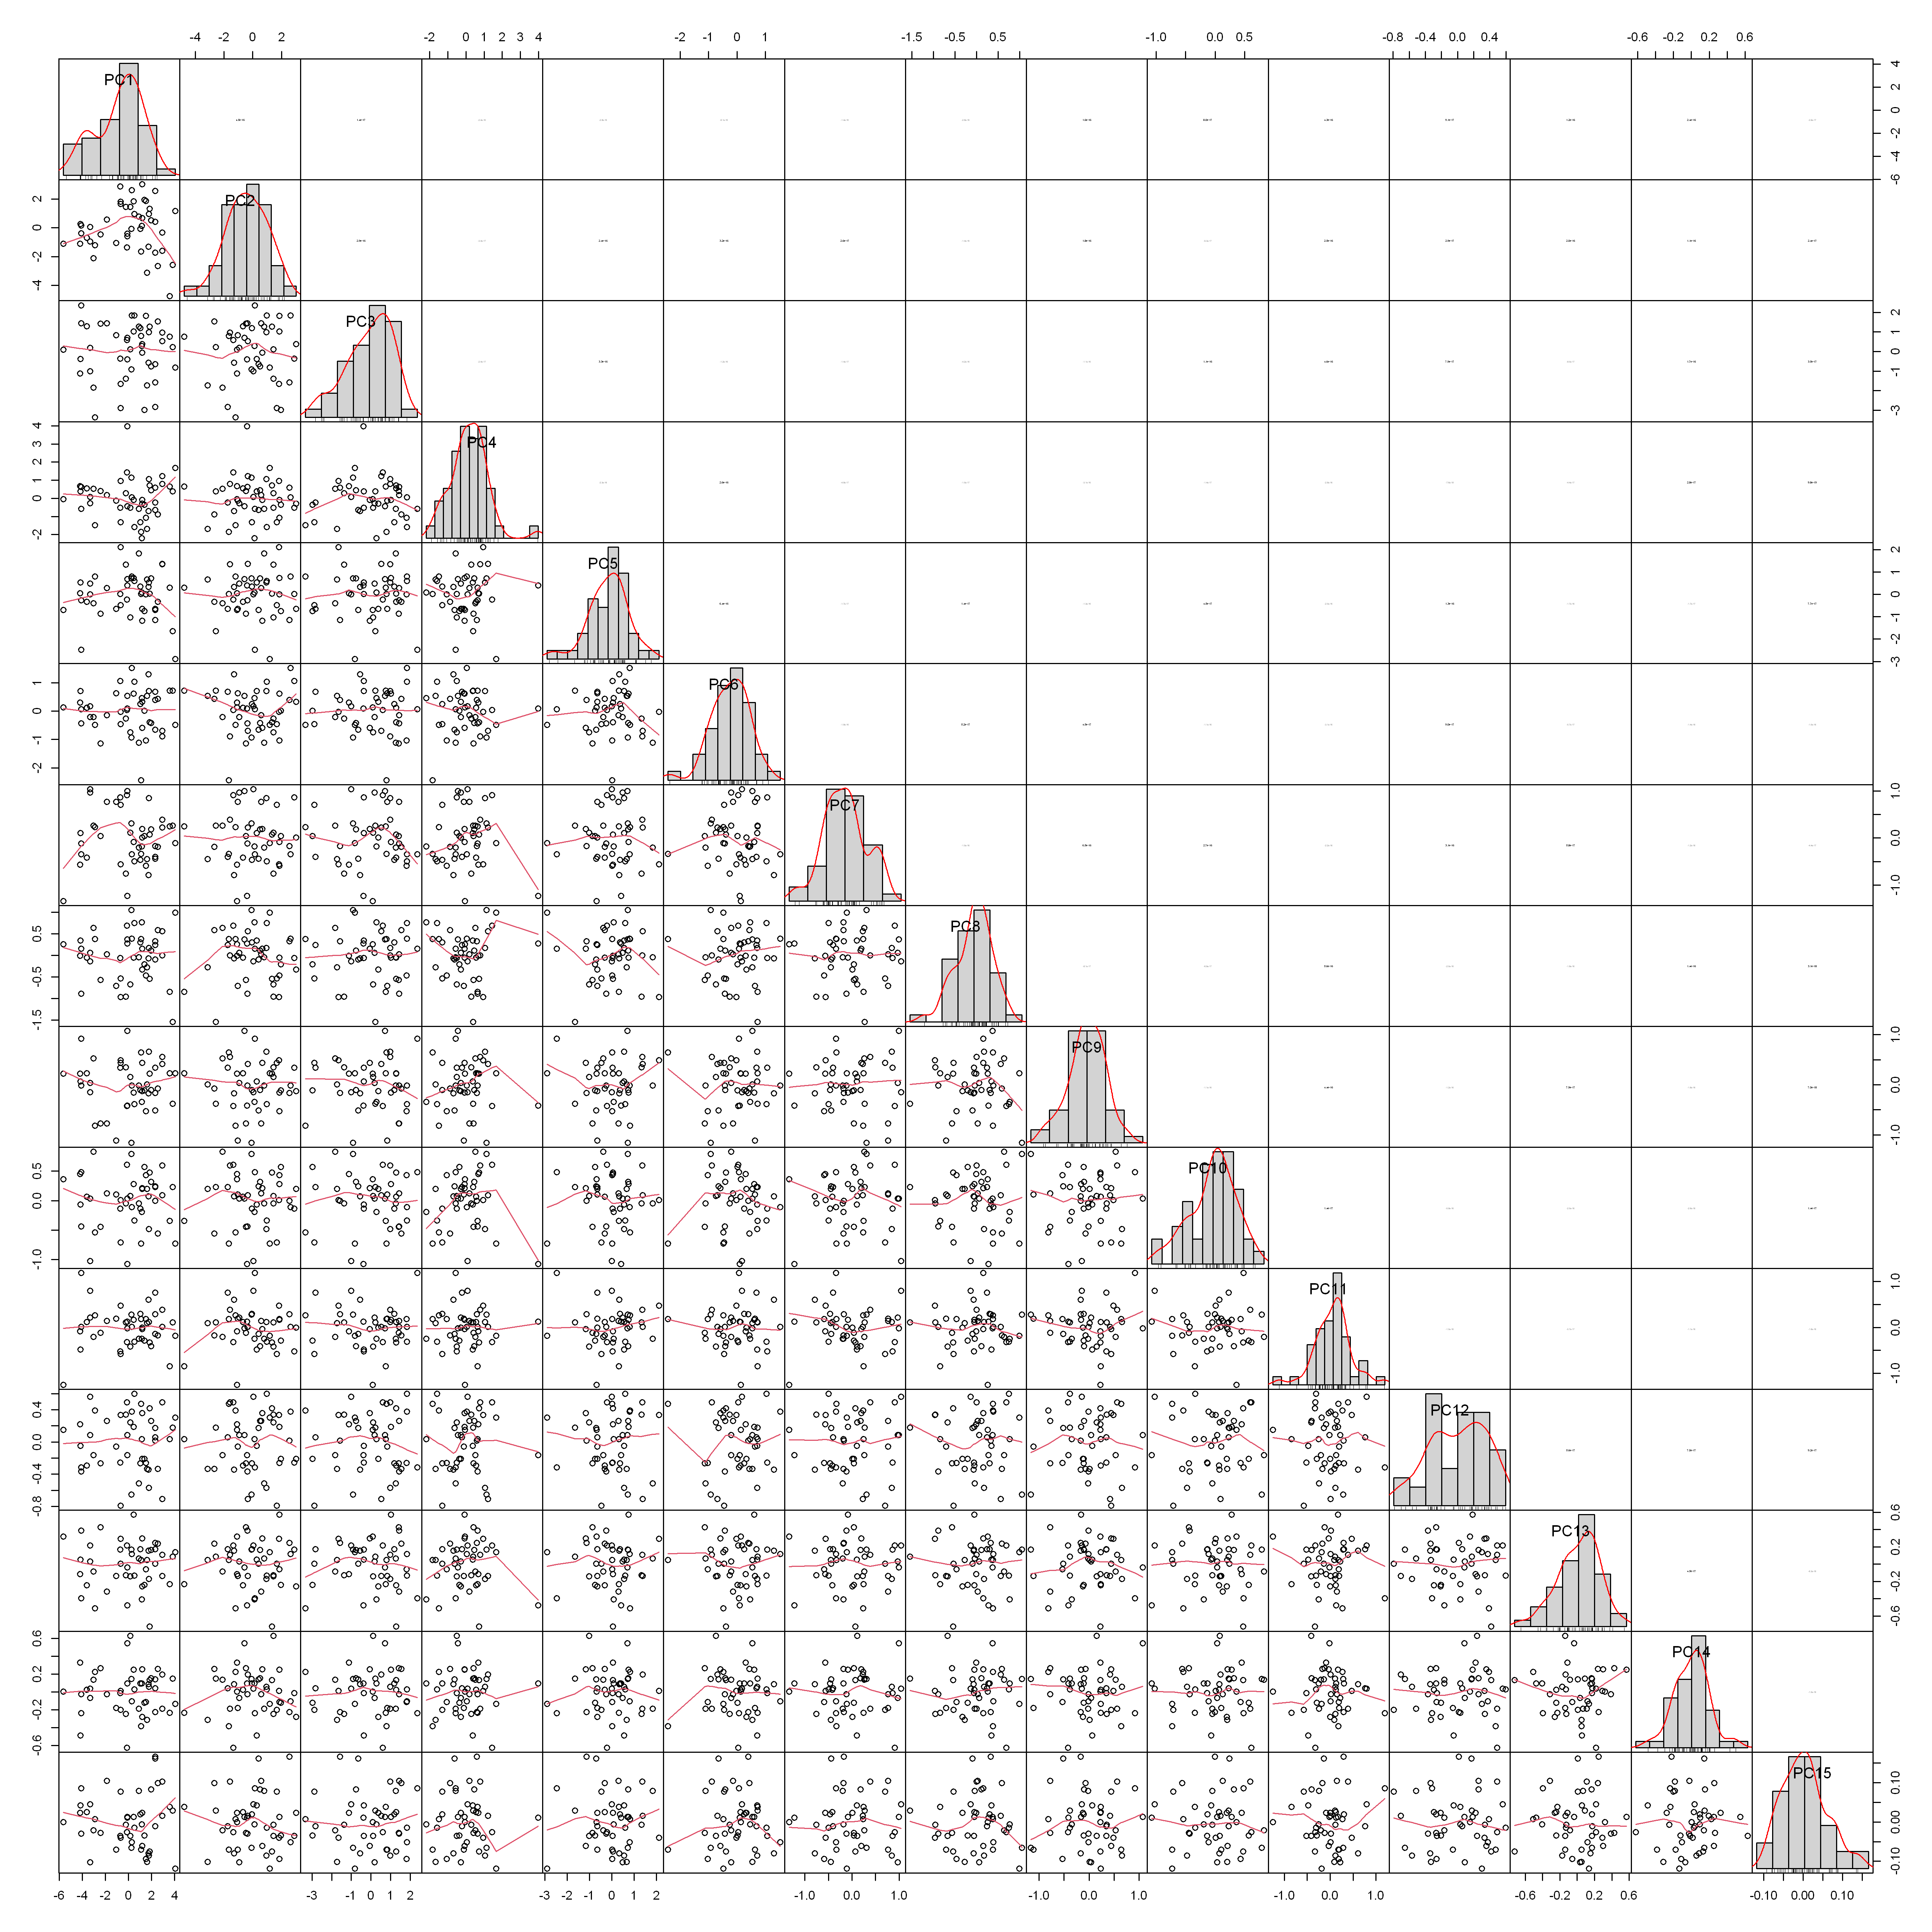

In [276]:
library(PerformanceAnalytics)

figsize <- 300
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)
chart.Correlation(crime_pca$rotated)

### 1.2 Loadings Analysis

It would be useful to inspect the composition of the most prominent PCs in terms of loadings - just in case PCs identifies hidden factors. Below is a biplot for the first two PCs, which explains 40.13% and 18.68% variation in the data. 

A biplot consists of a scatter plot of the data sample in terms of their values of PC1 and PC2, and a vector plot showing the loadings for each original variable. For example, we see that `time` is lies around the y-axis, which means that it is negatively correlated with PC2, but mostly uncorrelated with PC1. Two vectors that form a small angle (e.g. almost parallel) are highly correlated. We see that PC1 is mostly driven by `Weath (+)`, `Ineq (-)` and PC2 is mostly driven by `Time (-)`, `U2 (-)`, `M.F (+)`, `Pop (-)`, while other features have similar contributions to both PCs. 

It looks like PC1 is capturing the effect of an affluence society - where per capita weath is high and wealth inequality is low. It is unclear to me what real life effects PC2 could represent - perhaps overall efficiency in the labor market, _remotely_? Anyway, in general, we should not expect PCs to represent tangible, interpretable factors.

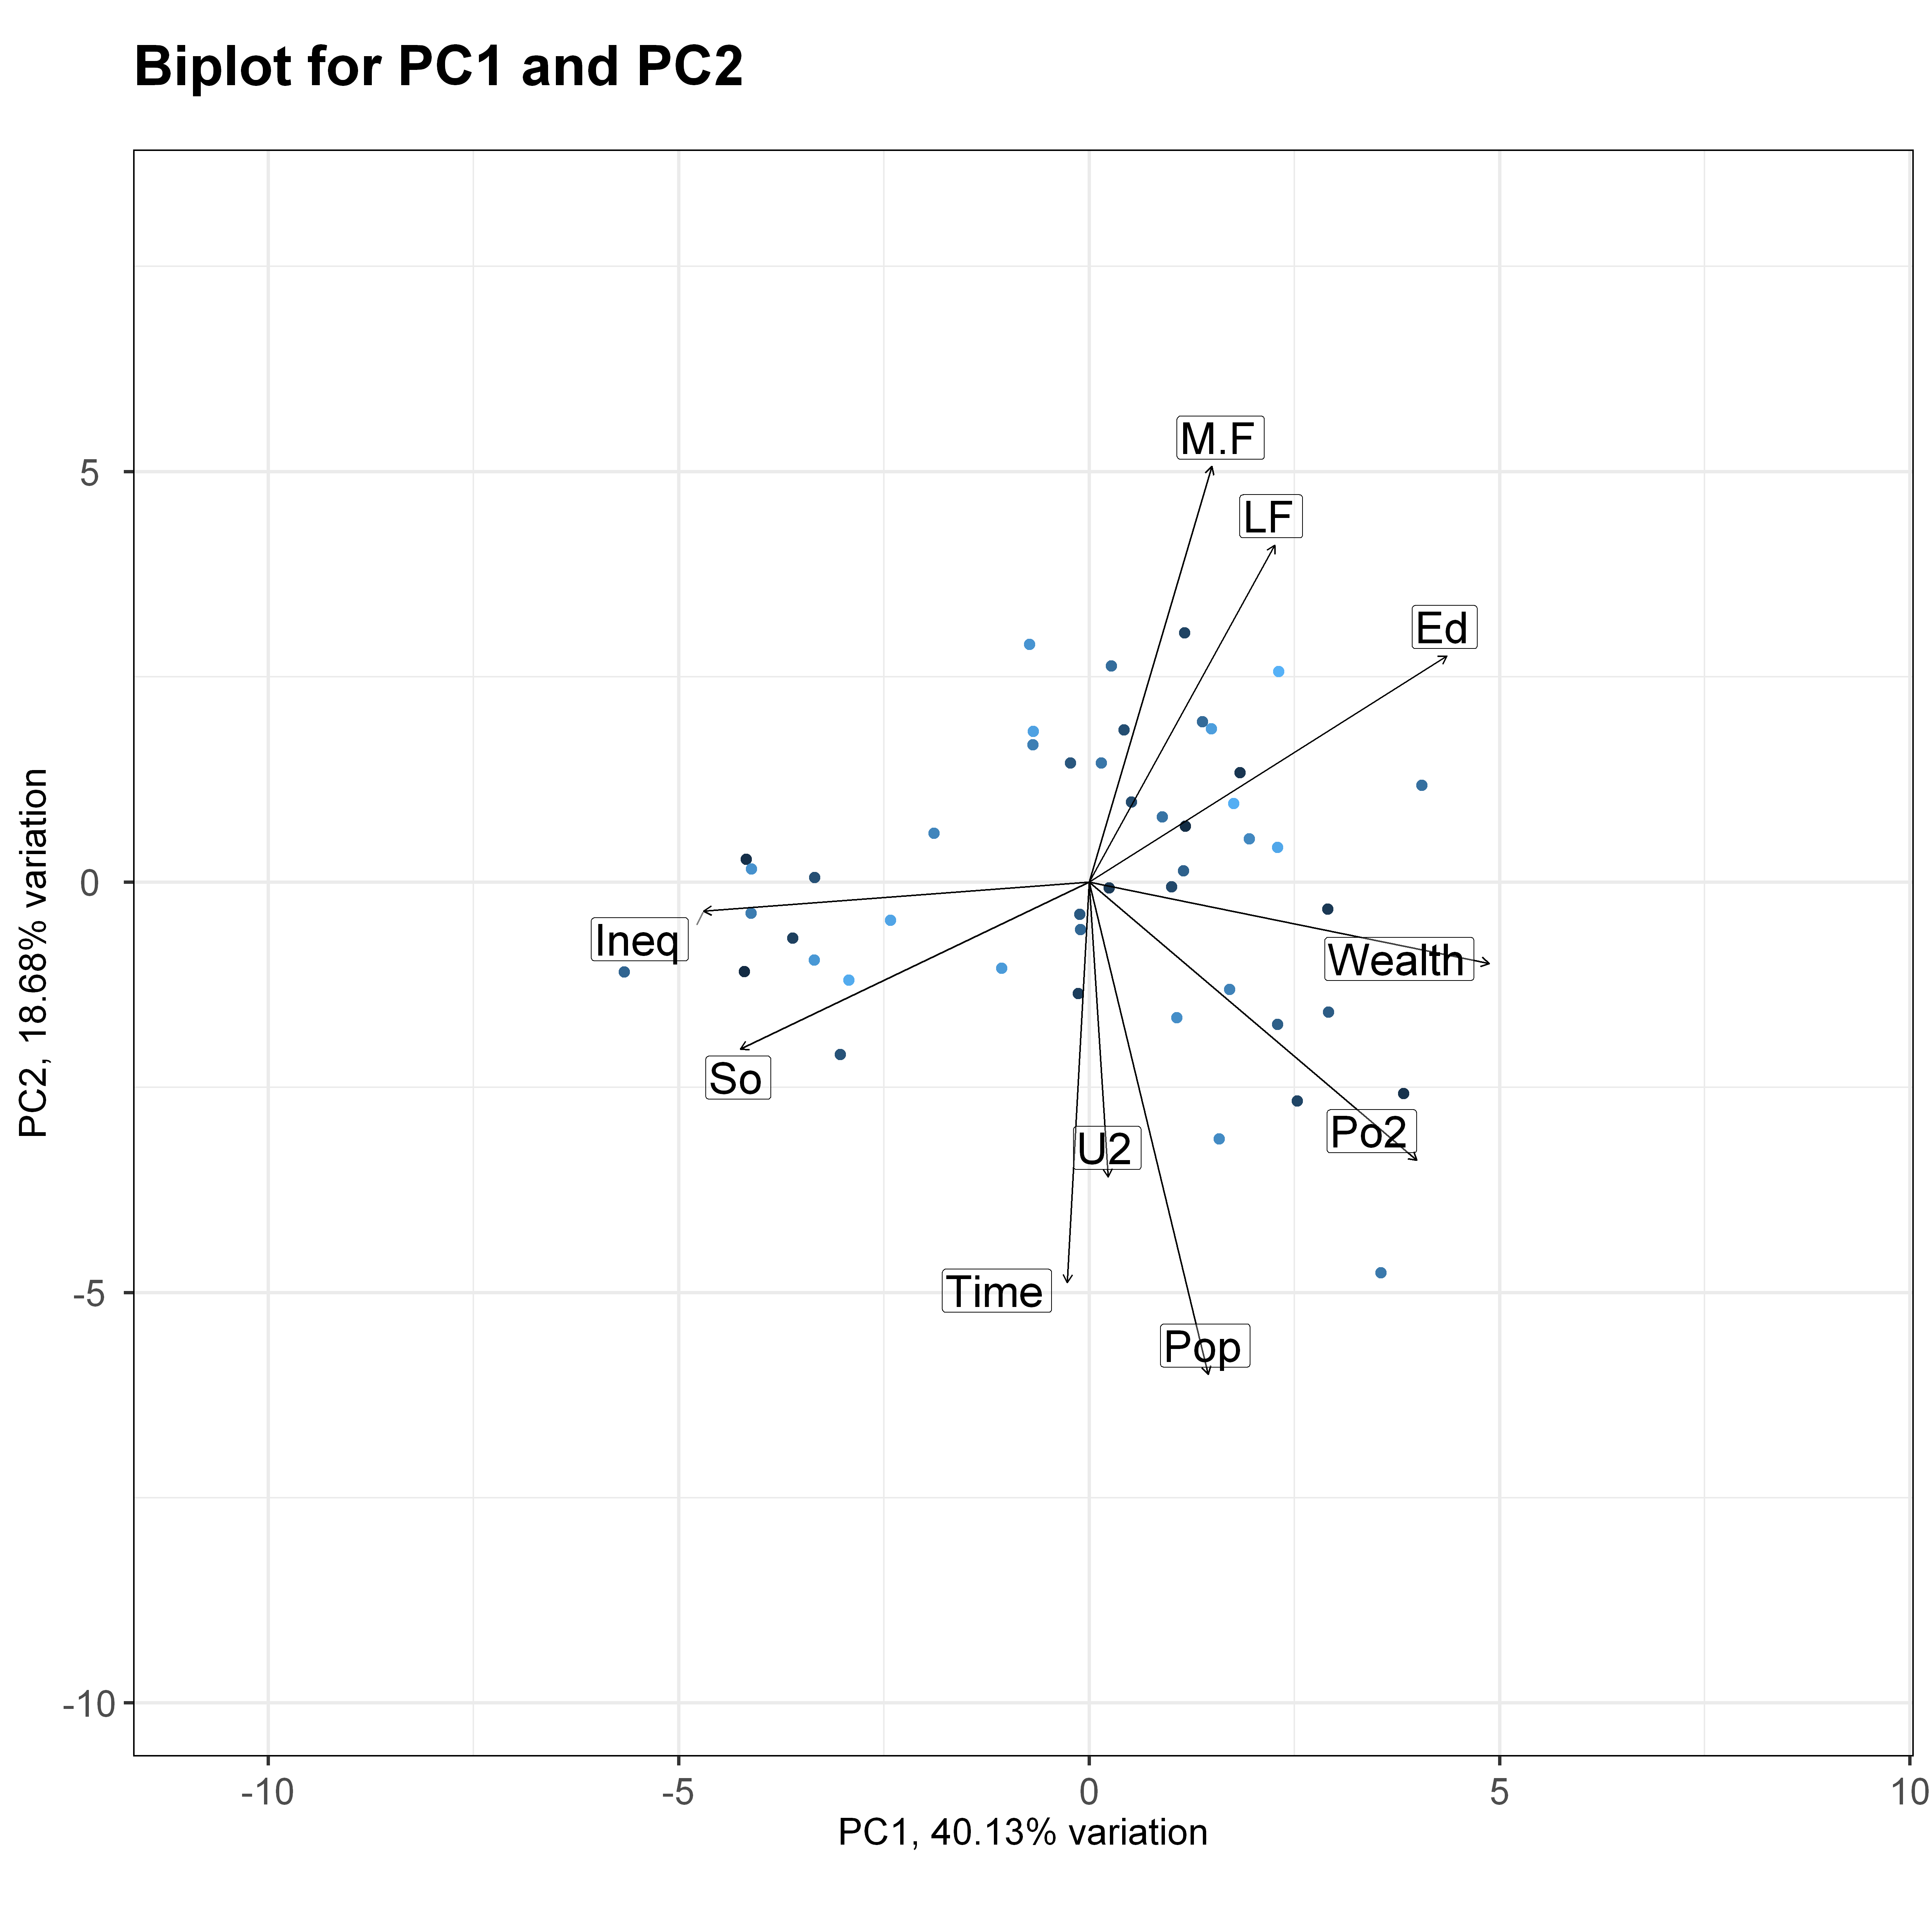

In [289]:
biplot(crime_pca, showLoadings = TRUE, lab=NULL, 
       sizeLoadingsNames=10, axisLabSize = 24, 
       title="Biplot for PC1 and PC2", titleLabSize = 36)

### Loadings Plot

For the readers' information, here are the loading plots for the top 5 PCs. Again, we don't see particular patterns that could be of clear socio-economic interpretations.

-- variables retained:

Wealth, Ineq, M.F, Pop, LF, U1, Prob, Time



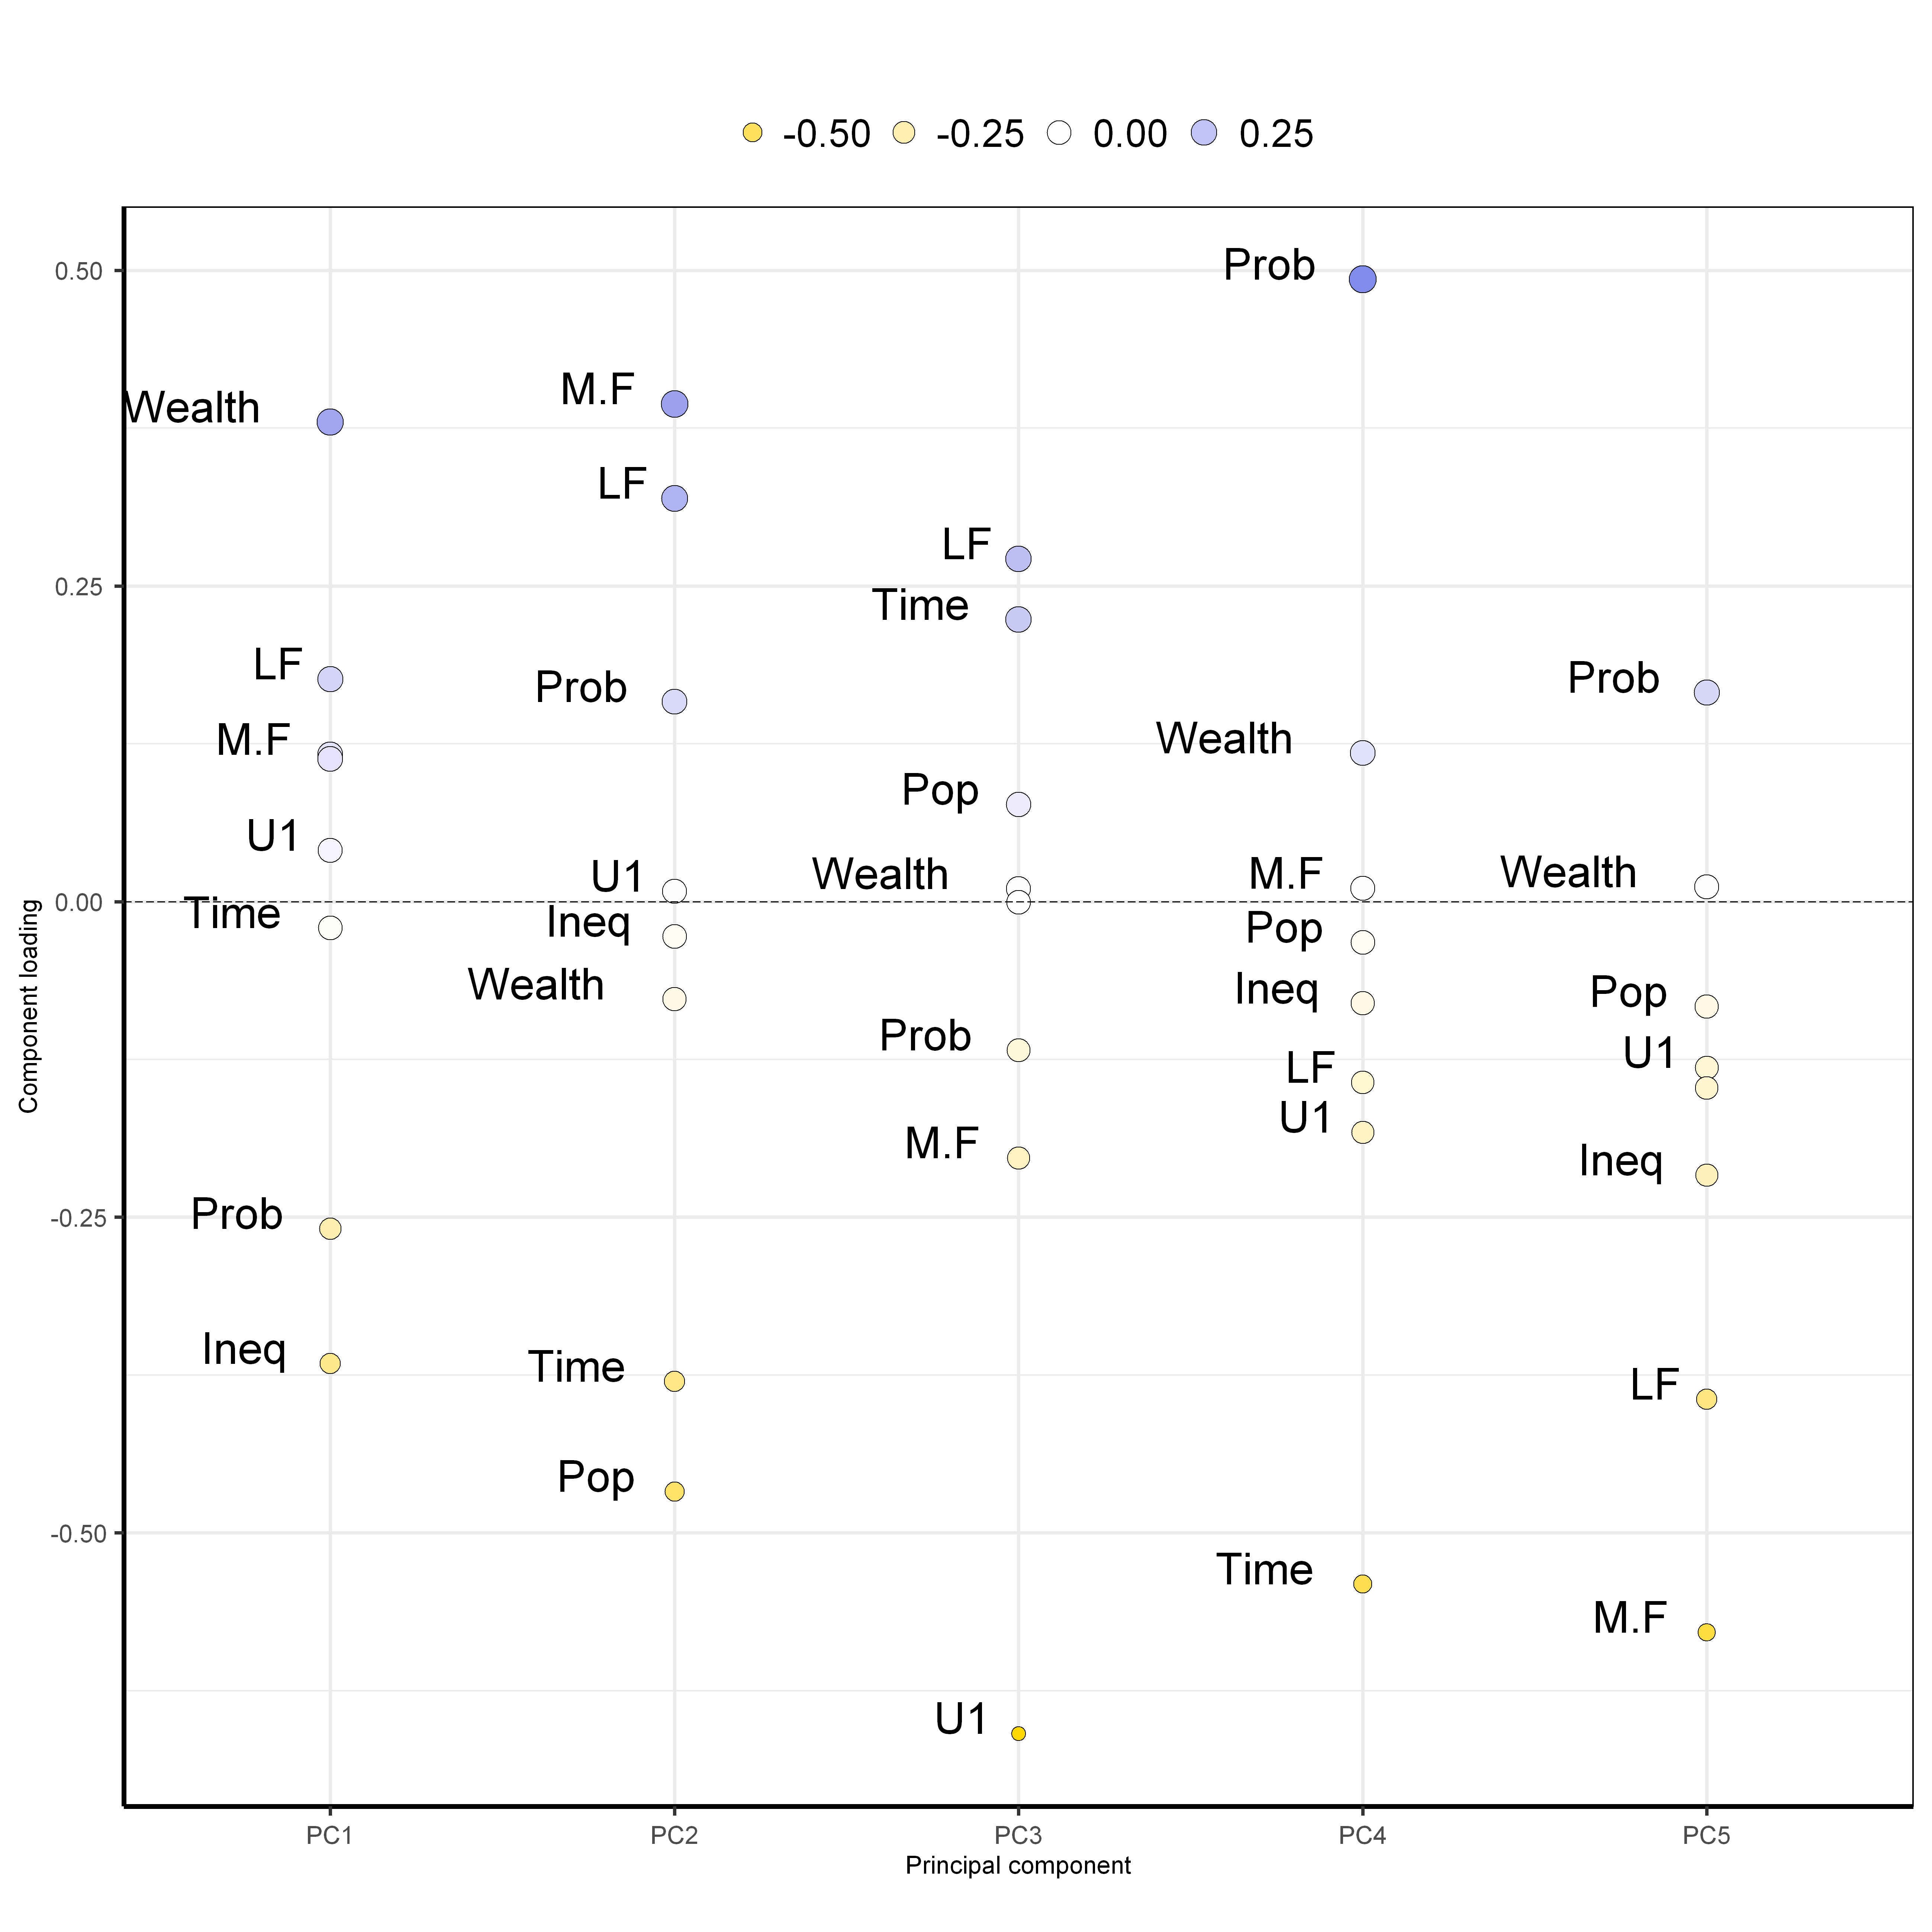

In [271]:
plotloadings(crime_pca, rangeRetain = 0, legendLabSize=25, labSize=10, 
             drawConnectors = FALSE, shapeSizeRange = c(4, 8))

## 2. Dimensionality Selection

In this section, we how many PCs to keep, i.e. how much dimensionality reduction to have. Regarding this, we will make use of several well-known methods.

### 2.1 Scree Plot

The scree plot method is a (heuristic) elbow method that determines when keeping PCs yield diminishing gains in explained variance. The scree plot can be a line plot of the eigenvalues against the number of PCs, as per the lecture, or in terms of percentage explained variance. I have found the latter more intuitive because the metric provides more context than the magnitude of eigenvalues. [A rule of thumb](https://bioturing.medium.com/how-to-read-pca-biplots-and-scree-plots-186246aae063) is to keep PCs until 80% variance is explained.

As shown in the scree plot below, we would like to keep __4 PCs__.

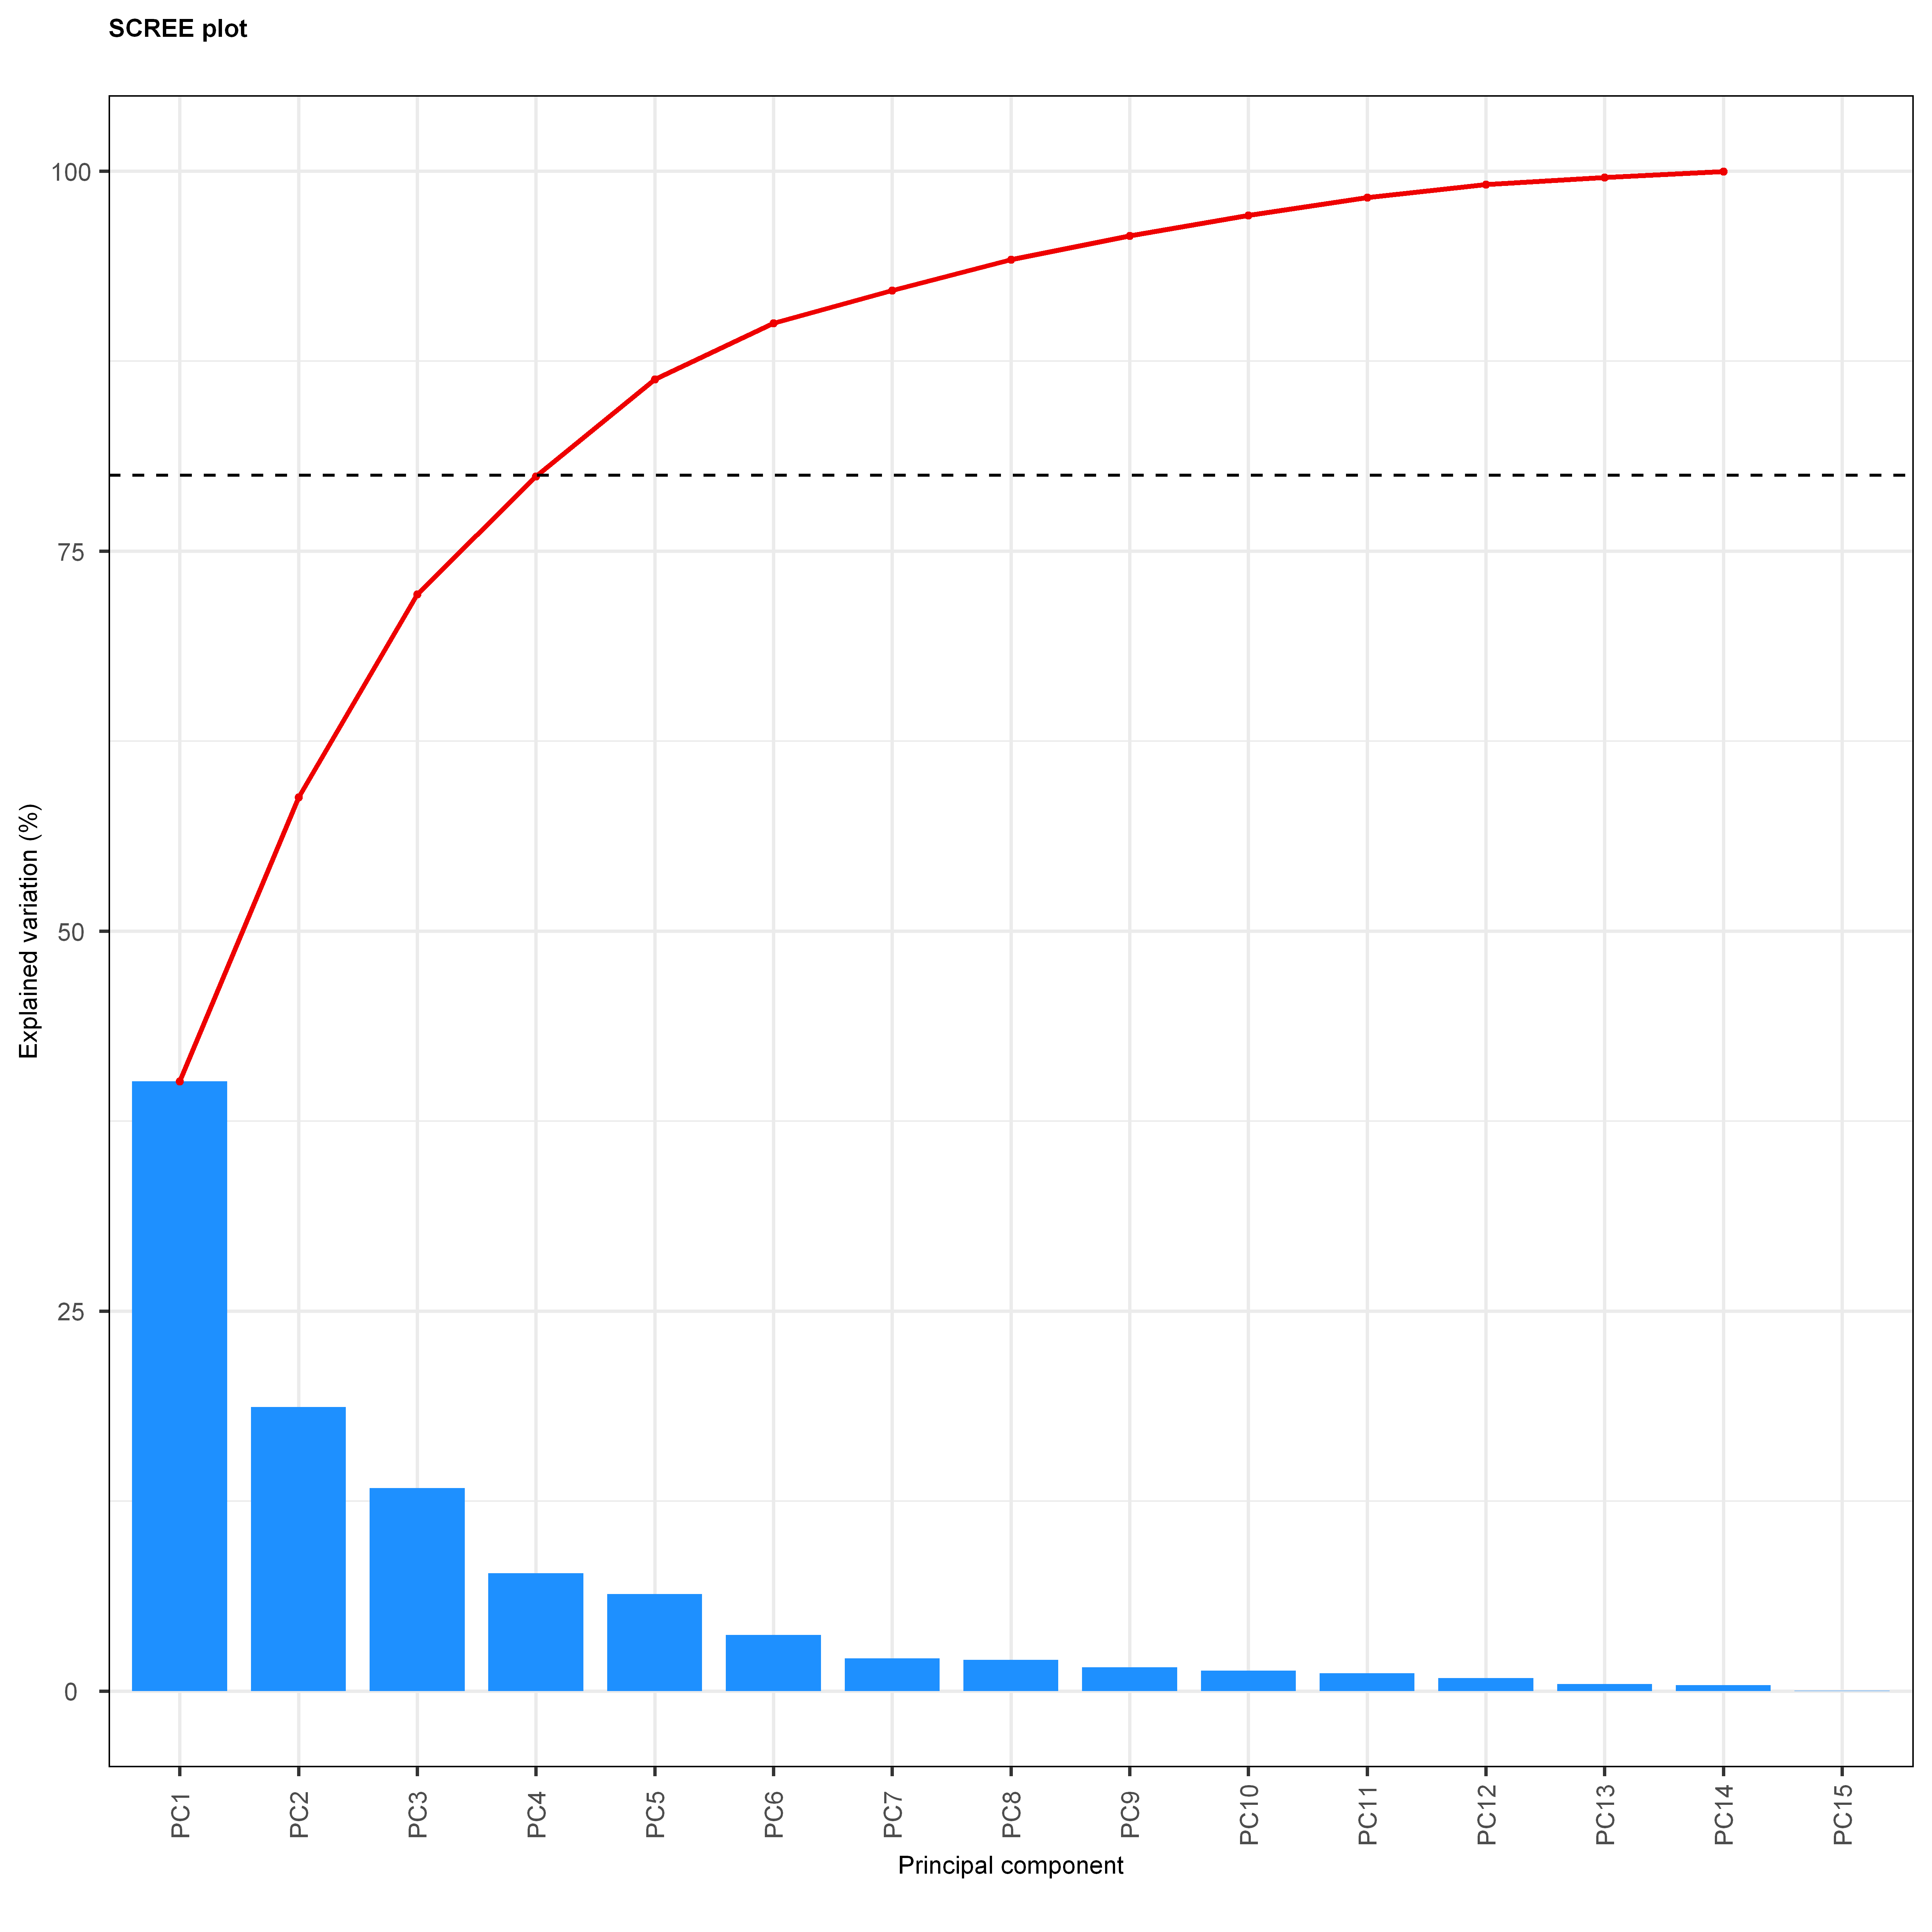

In [295]:
screeplot(crime_pca, hline=80, hlineType='dashed', hlineWidth=1)

### Elbow Method

While our judgement above was based on a rule of thumb of 80% cutoff, we can also implement the elbow method, automated by `findElbowPoint()`, which also agrees that PC4 is appropriate.

In [297]:
findElbowPoint(crime_pca$variance)

PC4 
  4

## 2.2 Horn's Parallel Analysis

[Horn's parallel analysis](https://en.wikipedia.org/wiki/Parallel_analysis) is a statistical method used to determine the number of components to keep in a principal component analysis or factors to keep. Essentially, the method compares the eigenvalues generated from the data matrix to the eigenvalues generated from a Monte-Carlo simulated matrix created from random data of the same size. 

According to the [documentation](https://www.rdocumentation.org/packages/PCAtools/versions/2.3.7/topics/parallelPCA) of `parallelPCA`. In the first step, observations within each row of the data are shuffled to create a permuted matrix. PCA is performed on the permuted matrix to obtain the percentage of variance explained under a random null hypothesis. This is repeated over several iterations to obtain a distribution of curves on the scree plot.

For each PC, the "p-value" is defined as the proportion of iterations where the variance explained at that PC is greater than that observed with the original matrix. The number of PCs to retain is defined as the last PC where the p-value is below the `threshold` parameter, which is set at 0.1. This aims to retain all PCs that explain "significantly" more variance than expected by chance.

<b>Findings</b>: The Horn's Parallel Analysis suggests choosing __3 PCs__.

In [331]:
horn_PCA <- parallelPCA(dat, threshold=.1, niters=200)
print(paste('Horn\'s Parallel analysis suggests chooing', horn_PCA$n, 'PCs.'))

[1] "Horn's Parallel analysis suggests chooing 3 PCs."


### A Deeper Look

We set `niters` equal 200, so the data was permuted 200 times to mimick the random null hypothesis. As we can see below, only PC1, PC2, and PC3 had higher variance in the dataset, than randomly permuted trials (note that this does not represent the "p-value" rule because these are just averages). 

In [340]:
data.frame(
    row.names = crime_pca$components,
    data = crime_pca$variance,
    random = horn_PCA$permuted %>% rowMeans
)

,data,random
,<dbl>,<dbl>
PC1,40.1263510,14.22272
PC2,18.6789802,12.15325
PC3,13.3662956,10.77905
PC4,7.7480520,9.63236
PC5,6.3886598,8.61624
PC6,3.6879593,7.63129
PC7,2.1454579,6.78001
PC8,2.0493418,6.08390
PC9,1.5677019,5.32911


### 2.3 Other Methods

There are other model selection methods based on probabilistic frameworks, including the famous [Gavish and Donoho](https://arxiv.org/abs/1305.5870) threshold. However, such methods require a priori knowledge of the (Gaussian) noise variance (which makes sense in problems like image compression). It is unclear how the concept of this parameter can be applied to our case.

## 3.Regression Model Estimation

We take out 3 and 4 PC reduced datasets to the regression model. First, we regress `Crime` on the 3/4 PCs. Then, for each model we will do a leave-one-out CV and record the CV sum of error squares. Finally, to convert coefficients back to interpretable units we will apply the rotation matrix and adding the mean to the constant.

### 3.1 Prelim Run

We see that R squareds for the 3 and 4 PC model is pretty low, around 0.27 and 0.309. The LOOCV mean errors are 128773.65 and 129151.30. 

In [346]:
PC3_dat <- crime_pca$rotated[, 1:3]
PC3_dat %<>% cbind(., crime_dta[, .(Crime)])
lm('Crime ~ .', PC3_dat) %>% summary()


Call:
lm(formula = "Crime ~ .", data = PC3_dat)

Residuals:
   Min     1Q Median     3Q    Max 
-597.7 -225.4    6.8  153.2  926.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    905.1       49.8   18.18   <2e-16 ***
PC1             65.2       20.5    3.18   0.0027 ** 
PC2            -70.1       30.1   -2.33   0.0245 *  
PC3             25.2       35.5    0.71   0.4823    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 341 on 43 degrees of freedom
Multiple R-squared:  0.272,	Adjusted R-squared:  0.221 
F-statistic: 5.35 on 3 and 43 DF,  p-value: 0.00322


In [391]:
PC4_dat <- crime_pca$rotated[, 1:4]
PC4_dat %<>% cbind(., crime_dta[, .(Crime)])
lm('Crime ~ .', PC4_dat) %>% summary()


Call:
lm(formula = "Crime ~ .", data = PC4_dat)

Residuals:
   Min     1Q Median     3Q    Max 
-557.8 -210.9  -29.1  197.3  810.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    905.1       49.1   18.44   <2e-16 ***
PC1             65.2       20.2    3.23   0.0024 ** 
PC2            -70.1       29.6   -2.36   0.0227 *  
PC3             25.2       35.0    0.72   0.4760    
PC4             69.4       46.0    1.51   0.1387    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 336 on 42 degrees of freedom
Multiple R-squared:  0.309,	Adjusted R-squared:  0.243 
F-statistic:  4.7 on 4 and 42 DF,  p-value: 0.00318


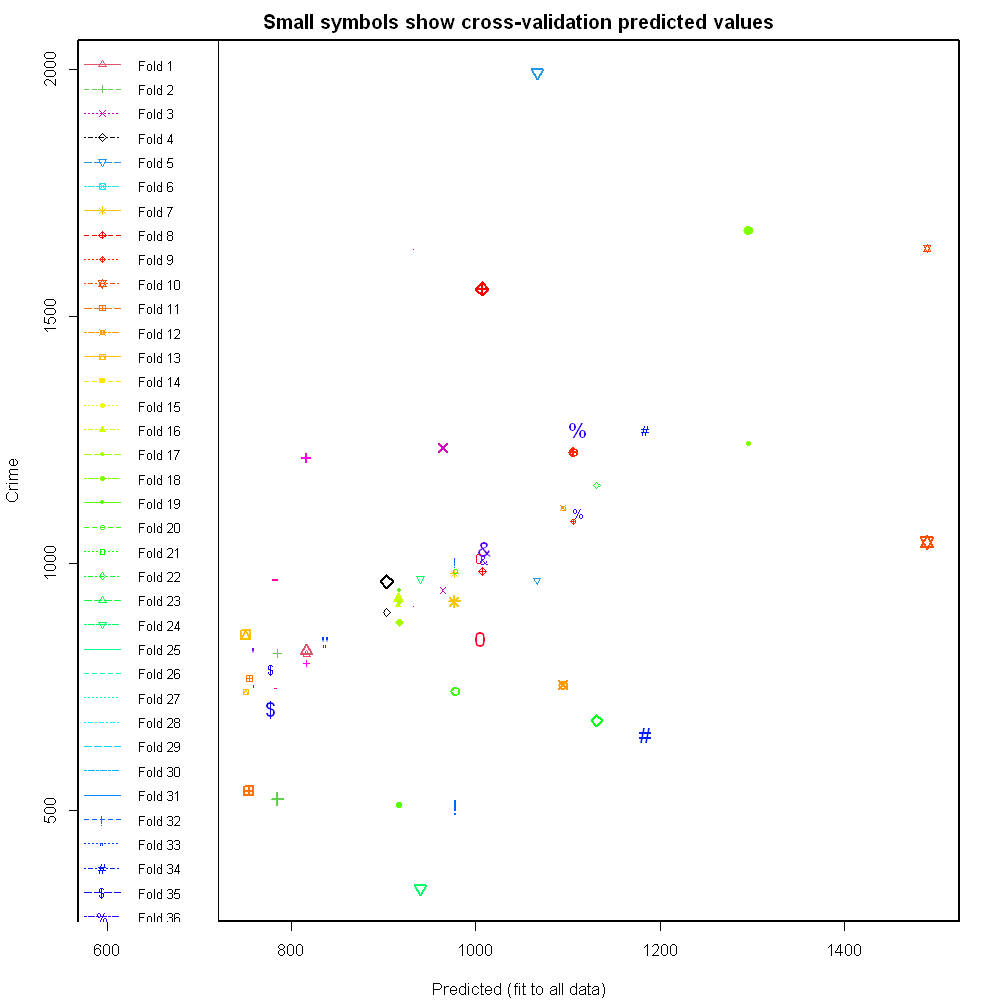

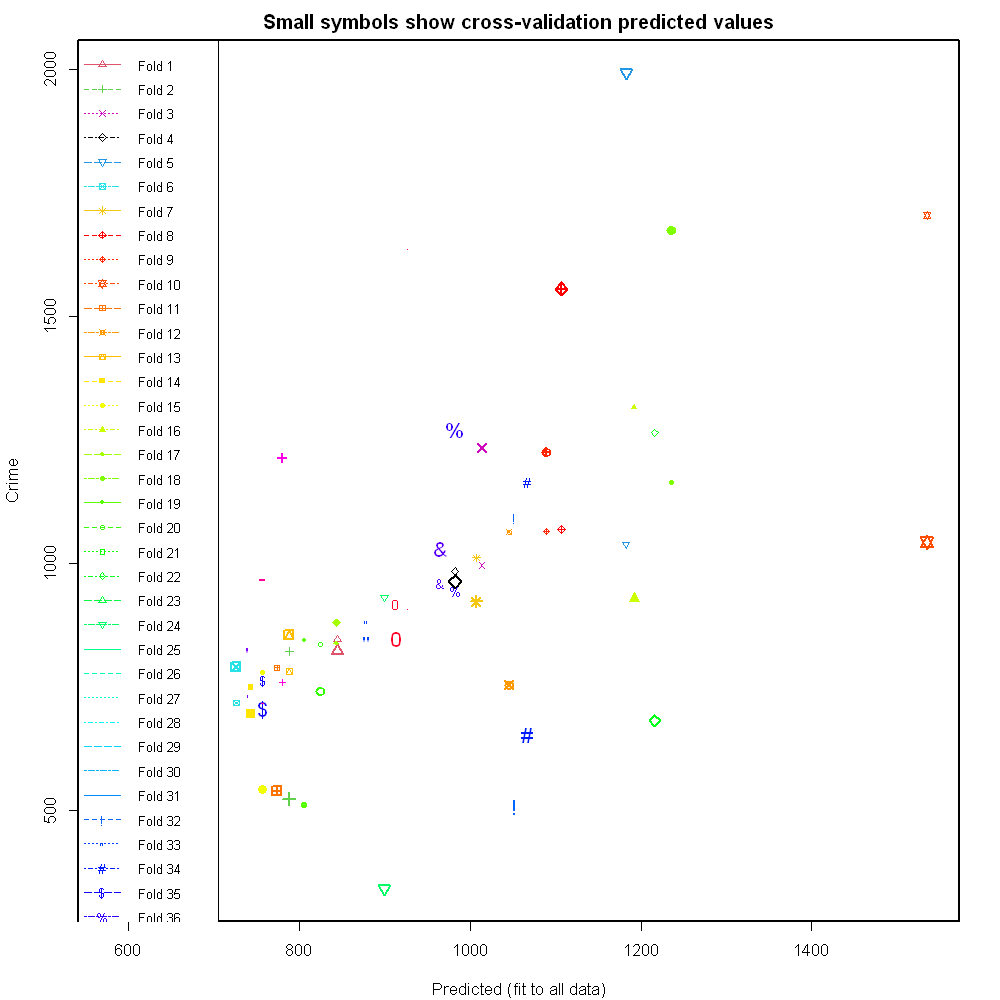

In [421]:
library(DAAG)

figsize <- 100
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)

PC3_CV <- cv.lm(PC3_dat, 
                formula(Crime ~ PC1 + PC2 + PC3), 
                m=nrow(PC3_dat), plotit=TRUE, printit=FALSE)

PC4_CV <- cv.lm(PC4_dat, 
                formula(Crime ~ PC1 + PC2 + PC3 + PC4), 
                m=nrow(PC4_dat), plotit=TRUE, printit=FALSE)

In [422]:
c(PC3_CV %>% attr(., 'ms'), PC4_CV %>% attr(., 'ms'))

[1] 128774 129151

### 3.2 Further Exploration

The results above are somewhat disappointing - recall that our previous hand-picked model selection and Lasso regression had mean sum of sqaured errors being 72665 and 65871 from LOOCV - what we thought are good dimensionality reduction model of the data are underperforming.

Perhaps, what appears to be a good dimensionality reduction model doesn't translate to good regressions for small datasets. We continue to add PCs in the regression model and see how the CV errors change. It looks like the CV error started dropping at the 5 CV specification, stayed flat, and then begain to increase again - implying overfitting. We'll choose the 5 PC model by virtue of Orcam's Razor.

Even though our dimensionality reduction trick above did not reach this model, there is still an advantage of doing PCA. This lies in the fact that the importance of PCs are identified and ranked in PCA, so a simple rule such as choosing from the beginning (PC1) forward is justified. 

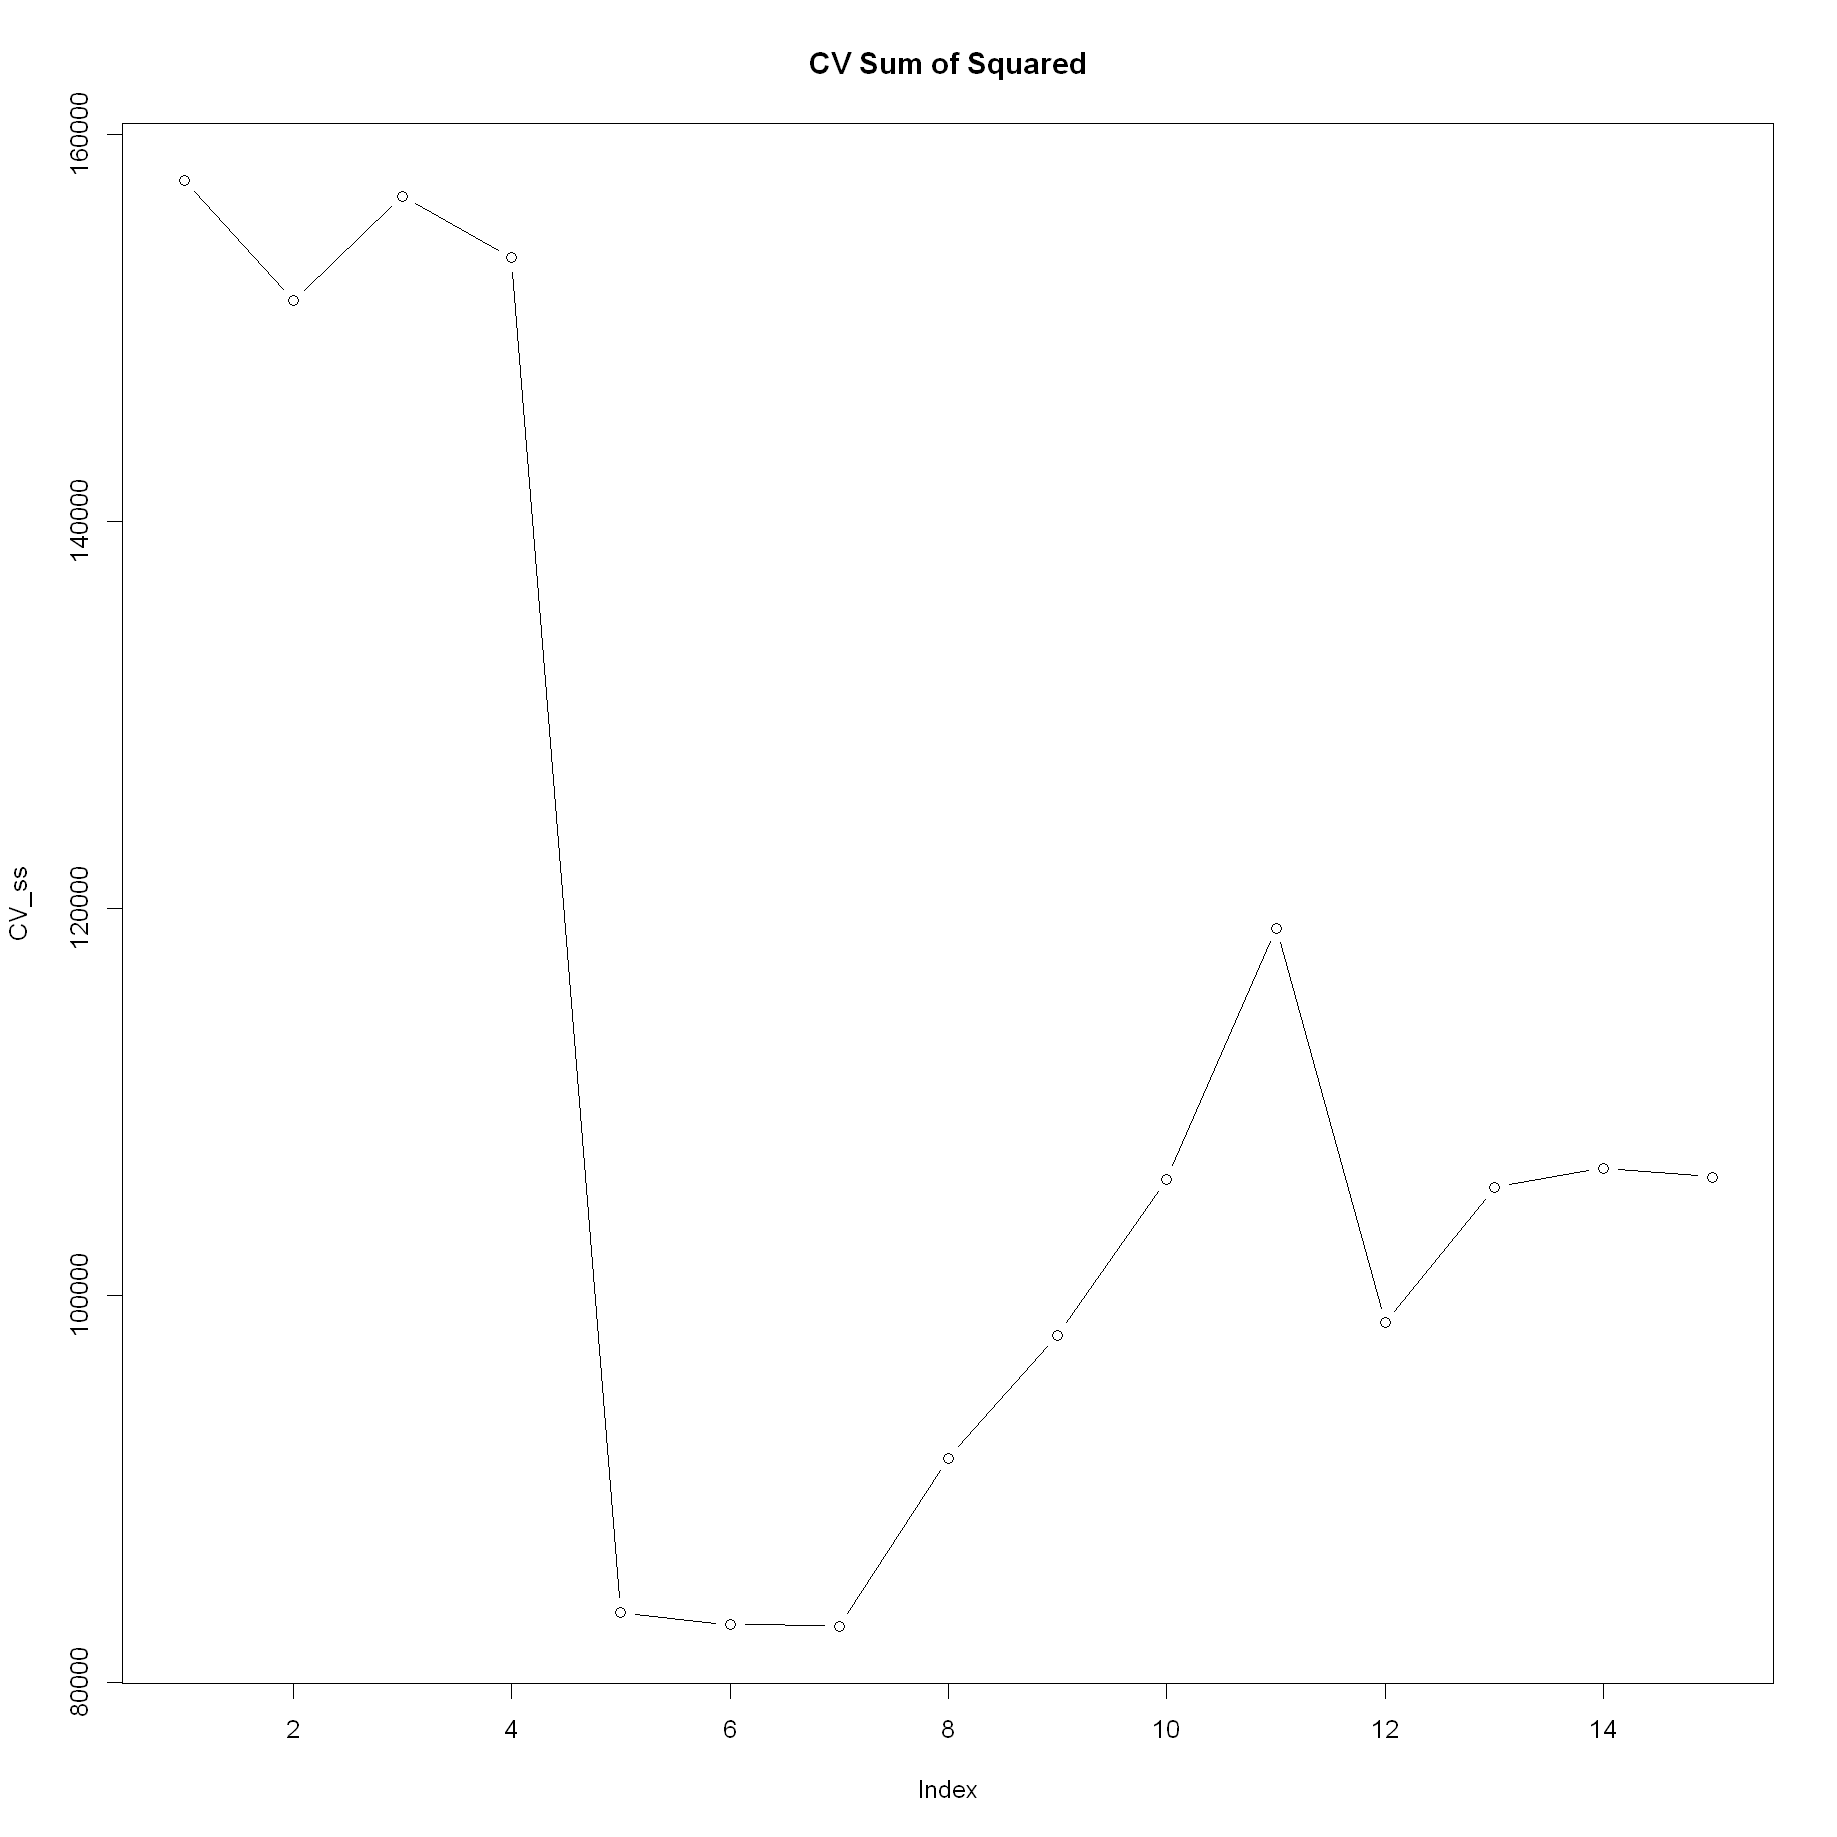

In [424]:
CV_ss <- c()

for (n in 1:15) {
    capture.output(PC_model_CV <- cv.lm(cbind(crime_pca$rotated[, 1:n], crime_dta[, .(Crime)]), 
                         formula(Crime ~ .), 
                         m=nrow(PC4_dat), plotit=FALSE, printit=TRUE))
    CV_ss <- c(CV_ss, PC_model_CV %>% attr(., 'ms'))
}

figsize <- 150
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)

plot(CV_ss, type="b")
title("CV Sum of Squared")

### 3.3 Transform Regression Coefficients

We make predictions at the required city given last time. First we need to transform the model coefficients. Because the PC are just linear combinations of the original standardized variables, we just need to multiply the loading matrix to obtain the coefficients in terms of original variables.

Next step is to transform the input city in the standardized form by demeaning then dividing by sd. The forecast is 1388.9.

In [517]:
n = 5
PC5_model <- lm('Crime ~ .', cbind(crime_pca$rotated[, 1:n], crime_dta[, .(Crime)])) %>% summary()
PC5_model$coeff

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),905.1,35.6,25.428,1.01e-26
PC1,65.2,14.7,4.447,6.51e-05
PC2,-70.1,21.5,-3.261,2.24e-03
PC3,25.2,25.4,0.992,3.27e-01
PC4,69.4,33.4,2.081,4.37e-02
PC5,-229.0,36.8,-6.232,2.02e-07


In [518]:
as.matrix(crime_pca$loadings[,1:n]) 

,PC1,PC2,PC3,PC4,PC5
M,-0.3037,0.06280,0.172420,-0.0204,-0.3583
So,-0.3309,-0.15837,0.015543,0.2925,-0.1206
Ed,0.3396,0.21461,0.067740,0.0797,-0.0244
Po1,0.3086,-0.26982,0.050646,0.3333,-0.2353
Po2,0.3110,-0.26396,0.053065,0.3519,-0.2047
LF,0.1762,0.31943,0.271530,-0.1433,-0.3941
M.F,0.1164,0.39434,-0.203162,0.0105,-0.5788
Pop,0.1131,-0.46723,0.077021,-0.0321,-0.0832
NW,-0.2936,-0.22801,0.078816,0.2393,-0.3608
U1,0.0405,0.00807,-0.659029,-0.1828,-0.1314


In [523]:
param_0 <- PC5_model$coeff[,1]
param_1 <- c(PC5_model$coeff[1], as.matrix(crime_pca$loadings[,1:n]) %*% param_0[-1] %>% as.matrix)
names(param_1) <- c('(Intercept)', crime_pca$loadings %>% rownames)
param_1 %>% as.list()

$`(Intercept)`
[1] 905

$M
[1] 60.8

$So
[1] 37.8

$Ed
[1] 19.9

$Po1
[1] 117

$Po2
[1] 111

$LF
[1] 76.3

$M.F
[1] 108

$Pop
[1] 58.9

$NW
[1] 98.1

$U1
[1] 2.87

$U2
[1] 32.3

$Wealth
[1] 35.9

$Ineq
[1] 22.1

$Prob
[1] -34.6

$Time
[1] 27.2

In [520]:
x <- c(1,14,0,10,12,15.5,.64,94,150,1.1,.12,3.6,3200,20.1,.04,39)
x1 <- c(1, (x[-1]-unlist(mean))/unlist(sd))

sum(param_1*x1)

[1] 1389